![proj photos.jpg](<attachment:proj photos.jpg>)
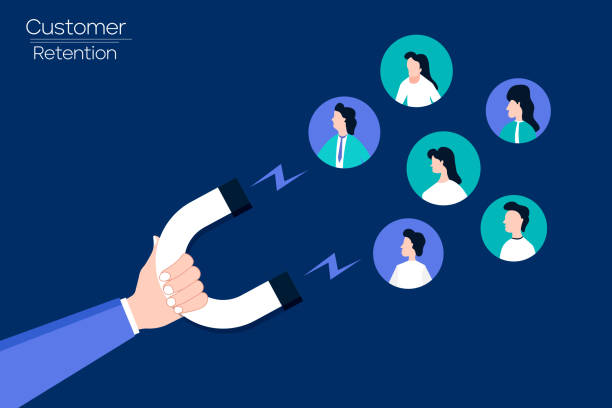

SYRIATEL CUSTOMER CHURN PREDICTION

AUTHOR : KELVIN MWAURA NJUNG'E

COHORT : DSFT08 (REMOTE)


BUSINESS UNDERSTANDING

Project Overview


Syriatel, a telecommunications company, is experiencing a significant rate of customer churn. Customer churn, or the rate at which customers stop doing business with a company, is a critical issue in the telecom industry. Retaining customers is not only more cost-effective than acquiring new ones but also crucial for sustaining profitability and market position. This project aims to build a predictive model to identify customers who are likely to churn, enabling Syriatel to implement proactive retention strategies to mitigate revenue loss.


STAKEHOLDERS

Primary Stakeholder:

Syriatel Mobile Telecom: The telecom company that will use the model to reduce customer churn and improve profitability.


Other Stakeholders:

Shareholders: Will benefit from increased profitability and market stability.

Employees: Will benefit from a more stable business environment and potentially better compensation.

Customers: Will benefit from improved services and customer support.

BUSINESS PROBLEM

The main business problem is the high rate of customer churn at Syriatel, leading to substantial revenue loss and increased costs associated with acquiring new customers. The goal is to develop a predictive model that can identify customers who are likely to churn, allowing Syriatel to take targeted actions to retain these customers and reduce overall churn rates.

Project Scope

In-Scope:


Identifying key features that predict customer churn.

Developing a robust classification model to predict churn.

Providing actionable insights and recommendations for retention of more customers


Out-of-Scope:

Directly implementing the retention strategies.

Long-term monitoring and adjustments of the model post-deployment.

RESEARCH OBJECTIVES

- Identify key features that determine customer churn. 

    We Analyze the relative importance of various features to uncover the key factors behind customer churn in the telecommunications sector. By pinpointing the most impactful contributors to churn, SyriaTel can gain valuable insights that will guide in them making strategic decisions, optimize resource allocation, and implement targeted initiatives to mitigate customer attrition effectively.


- Develop the most suitable model to predict customer churn.

 To compare the performance of different machine learning models to identify the most effective model for predicting churn.

 By comparing the performance of various models, SyriaTel can confidently select the most efficient one. This ensures that resources are optimally allocated for the implementation of churn-reduction strategies.

- Establish customer retention strategies to reduce churn.

 This endeavor is motivated by the notion that by accurately identifying customers at risk of churning, SyriaTel can proactively implement targeted retention strategies. These strategies may involve offering incentives, improving customer service experiences, and tailoring marketing approaches to align with the preferences of the at-risk customer segments. 



SUCCESS METRICS


- Achieve a high recall score  to ensure most at-risk customers are correctly identified.

- Identify key features that significantly contribute to customer churn.

- Provide clear, actionable recommendations for reducing churn and improving customer retention.

- Show the effectiveness of the churn prediction model in enabling proactive retention strategies and minimizing revenue losses.







DATA UNDERSTANDING


To better serve the identified consumers and clearly project the problem(s) stated in the background, I will use the Churn in Telecom's dataset from Kaggle (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).



The dataset contains 3333 ROWS and 21 columns, including information about the state, account length, area code, phone number, international plan, voice mail plan, number of voice mail messages, total day minutes, total day calls, total day charge, total evening minutes, total evening calls, total evening charge, total night minutes, total night calls, total night charge, total international minutes, total international calls, total international charge, customer service calls and churn.


DATASET FEATURES:


State: The state the customer lives in

Account Length: The number of days the customer has had an account.

Area Code: The area code of the customer

Phone Number: The phone number of the customer

International Plan: True if the customer has the international plan, otherwise false.

Voice Mail Plan: True if the customer has the voice mail plan, otherwise false.

Number Vmail Messages: the number of voicemails the customer has sent.

Total Day Minutes: total number of minutes the customer has been in calls during the day.

Total Day Calls: total number of calls the user has done during the day.

Total Day Charge: total amount of money the customer was charged by the Telecom company for calls during the day.

Total Eve Minutes: total number of minutes the customer has been in calls during the evening.

Total Eve Calls: total number of calls the customer has done during the evening.

Total Eve Charge: total amount of money the customer was charged by the Telecom company for calls during the evening.

Total Night Minutes: total number of minutes the customer has been in calls during the night.

Total Night Calls: total number of calls the customer has done during the night.

Total Night Charge: total amount of money the customer was charged by the Telecom company for calls during the night.

Total Intl Minutes: total number of minutes the user has been in international calls.

Total Intl Calls: total number of international calls the customer has done.

Total Intl Charge: total amount of money the customer was charged by the Telecom company for international calls.

Customer Service Calls: number of calls the customer has made to customer service.

Churn: true if the customer terminated their contract, otherwise false

IMPORTING THE NECESSARY LIBRARIES  TO USE DURING THE REST OF THE PROJECT FOR CLEANING, MODELLING AND OPTIMIZING.





In [3]:
# Data manipulation 
import pandas as pd 
import numpy as np 
import os 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier


# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
class DataFrameLoader:
    """
    A class to load and preprocess CSV data into a Pandas DataFrame,
    including loading, preprocessing 
    
    """

    def __init__(self, file_name):
        """
        Initialize the DataFrameLoader object with the name of the CSV file to load.

        Parameters:
        file_name (str): The name of the CSV file to load.
        """
        self.file_name = file_name
        self.data = None

    def load_data(self):
        """
        Loads the CSV data into a Pandas DataFrame.

        This method attempts to read the CSV file located in the current working directory.
        It handles exceptions for missing files and other errors gracefully.
        """
        try:
            current_dir = os.getcwd()
            file_path = os.path.join(current_dir, self.file_name)
            self.data = pd.read_csv(file_path)
            print(f"Data loaded successfully from {self.file_name}")
        except FileNotFoundError:
            print(f"Error: File {self.file_name} not found in the current directory.")
        except Exception as e:
            print(f"Error: {e}")

    

    def get_shape(self):
        """
        Prints the shape of the DataFrame (number of rows and columns).

        Returns:
        None
        """
        if self.data is not None:
            rows, columns = self.data.shape
            print(f"The DataFrame has {rows} rows and {columns} columns.")
        else:
            print("Data not loaded yet. Please call the load_data() method first.")

    def get_info(self):
        """
        Prints detailed information about the DataFrame, such as column names, data types, and memory usage.

        Returns:
        None
        """
        if self.data is not None:
            print(self.data.info())
        else:
            print("Data not loaded yet. Please call the load_data() method first.")
    def handle_missing_values(self):
        if self.data is not None:
            for col in self.data.columns:
                try:
                    # Attempt to convert column to numeric; if fails, it's likely categorical
                    pd.to_numeric(self.data[col], errors='coerce')
                    # Replace missing values with mean for numerical columns
                    self.data[col].fillna(self.data[col].mean(), inplace=True)
                except ValueError:
                    # Column is categorical, replace missing values with mode
                    self.data[col].fillna(self.data[col].mode()[0], inplace=True)
            print("Missing values handled.")
        else:
            print("Data not loaded yet. Please call the load_data() method first.")


    def describe_data(self):
        """
        Prints descriptive statistics of the DataFrame, excluding NaN values.

        Returns:
        None
        """
        if self.data is not None:
            print(self.data.describe())
        else:
            print("Data not loaded yet. Please call the load_data() method first.")

    def get_head(self, num_rows=5):
        """
        Returns the first `num_rows` rows of the DataFrame.

        Parameters:
        num_rows (int): Number of rows to return. Default is 5.

        Returns:
        DataFrame: The first `num_rows` rows of the DataFrame.
        None: If data has not been loaded.
        """
        if self.data is not None:
            return self.data.head(num_rows)
        else:
            print("Data not loaded yet. Please call the load_data() method first.")
            return None

    def check_duplicates(self):
        """
        Checks for duplicate rows in the DataFrame and prints the count.

        Returns:
        None
        """
        if self.data is not None:
            duplicates = self.data.duplicated().sum()
            if duplicates > 0:
                print(f"There are {duplicates} duplicate rows in the DataFrame.")
            else:
                print("No duplicate rows found in the DataFrame.")
        else:
            print("Data not loaded yet. Please call the load_data() method first.")

    def remove_duplicates(self):
        """
        Removes duplicate rows from the DataFrame.

        Returns:
        None
        """
        if self.data is not None:
            original_rows = self.data.shape[0]
            self.data.drop_duplicates(inplace=True)
            new_rows = self.data.shape[0]
            print(f"Removed {original_rows - new_rows} duplicate rows from the DataFrame.")
        else:
            print("Data not loaded yet. Please call the load_data() method first.")

# Utilize the function
file_name = 'bigml_59c28831336c6604c800002a.csv'
df_loader = DataFrameLoader(file_name)

# Load data
df_loader.load_data()


Data loaded successfully from bigml_59c28831336c6604c800002a.csv


In [5]:
#see first ten columns of the df
df_loader.get_head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [6]:
# Get shape of the data frame
df_loader.get_shape()

The DataFrame has 3333 rows and 21 columns.


Seeing that I have sufficient data points I can now proceed with the rest of the project without need to scrape or get more data elsewhere.

In [7]:
#knowing the data types of our data frame
df_loader.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

we can see that there are no missing values in our data set

In [8]:

# get the inferential statistics of our dataset
df_loader.describe_data()

       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

DATA PREPARATION
In this phase, which is often referred to as “data munging”, we will perform data cleaning, conduct exploratory data analysis (EDA), and data preprocessing.

In [9]:
df_loader.check_duplicates()


No duplicate rows found in the DataFrame.


In as much as we don't have any missing values and duplicate values we can further investigate the different columns to see how we can further clean the data and manipulate the different columns.
Since we have confirmed that there are no duplicates or missing values in our dataset, we can use the phone number column as our index to identify each customer.
The logic here is that each customer has a unique phone number.

In short it is our unique identifier


In [10]:
def set_phone_number_as_index(df_loader):
    """
    Sets the 'phone number' column as the index of the DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to modify.

    Returns:
    pandas.DataFrame: The DataFrame with 'phone number' set as the index.
    """
    df_loader.set_index('phone number', inplace=True)
    return df_loader

# Assuming df_loader.data contains your DataFrame after loading and preprocessing
df_with_phone_number_as_index = set_phone_number_as_index(df_loader.data)


In [11]:
#making sure the changes have been effected
df_loader.get_head()

state  account length  area code international plan  \
phone number                                                       
382-4657        KS             128        415                 no   
371-7191        OH             107        415                 no   
358-1921        NJ             137        415                 no   
375-9999        OH              84        408                yes   
330-6626        OK              75        415                yes   

             voice mail plan  number vmail messages  total day minutes  \
phone number                                                             
382-4657                 yes                     25              265.1   
371-7191                 yes                     26              161.6   
358-1921                  no                      0              243.4   
375-9999                  no                      0              299.4   
330-6626                  no                      0              166.7   

              total day calls  total day charge  total eve minutes  \
phone number                                                         
382-4657                  110             45.07              197.4   
371-7191                  123             27.47              195.5   
358-1921                  114             41.38              121.2   
375-9999                   71             50.90               61.9   
330-6626                  113             28.34              148.3   

              total eve calls  total eve charge  total night minutes  \
phone number                                                           
382-4657                   99             16.78                244.7   
371-7191                  103             16.62                254.4   
358-1921                  110             10.30                162.6   
375-9999                   88              5.26                196.9   
330-6626                  122             12.61                186.9   

              total night calls  total night charge  total intl minutes  \
phone number                                                              
382-4657                     91               11.01                10.0   
371-7191                    103               11.45                13.7   
358-1921                    104                7.32                12.2   
375-9999                     89                8.86                 6.6   
330-6626                    121                8.41                10.1   

              total intl calls  total intl charge  customer service calls  \
phone number                                                                
382-4657                     3               2.70                       1   
371-7191                     3               3.70                       1   
358-1921                     5               3.29                       0   
375-9999                     7               1.78                       2   
330-6626                     3               2.73                       3   

              churn  
phone number         
382-4657      False  
371-7191      False  
358-1921      False  
375-9999      False  
330-6626      False

EXPLORATORY DATA ANALYSIS(EDA)

Seeing that we don't have much cleaning to do we can now proceed to the next bit of our project.

This section focuses on exploring and understanding the dataset to uncover patterns, identify variable relationships, detect outliers, and gain insights before applying modeling or statistical techniques. We will conduct a comprehensive exploration using univariate, bivariate, and multivariate analysis to identify correlations and variable distributions, essential for feature engineering and modeling.


Univariate data analysis;

This examines a single variable. In our project, this involves analyzing the distribution of each feature to understand its characteristics and identify potential issues, such as outliers.

We begin with the target variable, churn, to understand its distribution. This categorical variable has boolean values (True or False) indicating whether a client is likely to churn.

First, we visualize the data distribution in this column using a pie chart.

Data loaded successfully from bigml_59c28831336c6604c800002a.csv


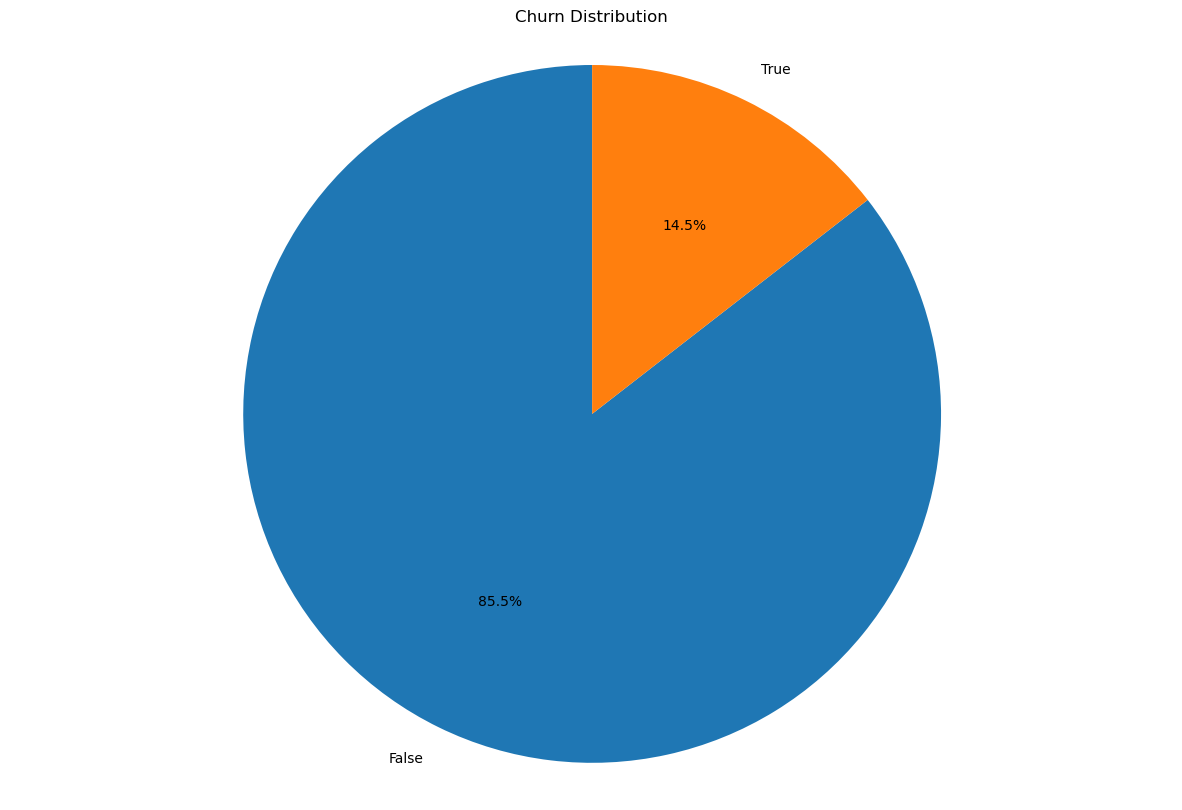

In [12]:


class DataAnalysis:
    """
    A class for performing data analysis on a given DataFrame.
    """

    def __init__(self, data):
        """
        Initialize the DataAnalysis object with the data to analyze.

        Parameters:
        data: The data to analyze.
        """
        self.data = data

    def plot_churn_distribution(self):  #Plot the distribution of the 'churn' column as a pie chart.
        
         # Get the value counts for the 'churn' column
        churn_counts = self.data['churn'].value_counts()

        # Create a new figure with a larger size
        plt.figure(figsize=(15, 10))

        # Create a pie chart
        plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title('Churn Distribution')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
        plt.show()

    def plot_histograms(self):
        """
        Function to plot histograms for the distribution of all numerical features.
        """
        # Filter out numerical columns
        numerical_cols = self.data.select_dtypes(include=['int64', 'float64']).columns.tolist()

        # Calculate number of rows and columns for subplots
        num_cols = len(numerical_cols)
        num_rows = (num_cols + 1) // 2

        # Create a figure with multiple subplots
        fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 6 * num_rows))

        # Flatten the axes array
        axes = axes.flatten()

        # Plot histograms for each numerical feature
        for i, col in enumerate(numerical_cols):
            sns.histplot(data=self.data[col], ax=axes[i], kde=True, bins=20)
            axes[i].set_title(f'Histogram for {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')

        # Hide empty subplots
        for j in range(num_cols, len(axes)):
            axes[j].axis('off')

        # Adjust layout
        plt.tight_layout()

        # Show the plot
        plt.show()

    def check_outliers(self):
        """
        Function to check for outliers in all numerical columns using boxplots.
        """
        # Filter out numerical columns
        numerical_cols = self.data.select_dtypes(include=['int64', 'float64']).columns.tolist()

        # Divide the numerical columns into two equal parts
        mid = len(numerical_cols) // 2
        cols1 = numerical_cols[:mid]
        cols2 = numerical_cols[mid:]

        # Create a figure with one row and two columns
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

        # Create a boxplot for the first subset of numerical columns in the first column
        sns.boxplot(data=self.data[cols1], ax=axes[0])
        axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
        axes[0].set_title('Boxplots for Subset 1')

        # Create a boxplot for the second subset of numerical columns in the second column
        sns.boxplot(data=self.data[cols2], ax=axes[1])
        axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
        axes[1].set_title('Boxplots for Subset 2')

        # Setting the figure title
        fig.suptitle('Boxplots for Different Subsets of Numerical Columns', fontsize=16)

        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.4)

        # Show the plot
        plt.show()


    file_name = 'bigml_59c28831336c6604c800002a.csv'

# Create an instance of DataFrameLoader with the specified file name
loader = DataFrameLoader(file_name)
# Load the data from the CSV file
loader.load_data()

# If data is loaded successfully, proceed with data analysis
if loader.data is not None:
    # Create an instance of DataAnalysis with the loaded data
    data_analysis = DataAnalysis(loader.data)
    # Check for outliers excluding the 'churn' column
    data_analysis.plot_churn_distribution()
    


The dataset contained 3,333 customers, out of which 483 customers terminated their contract with the Telecom firm. This represents a customer churn rate of 14.5%. An analysis of the binary target variable (whether the customer churned or not) reveals an imbalance in the class distribution. Such an imbalanced dataset can lead to biased predictions from machine learning models if not addressed appropriately.




Let's examaine the distribution of the numerical columns.    We will plot the histograms by calling the plot histogram function

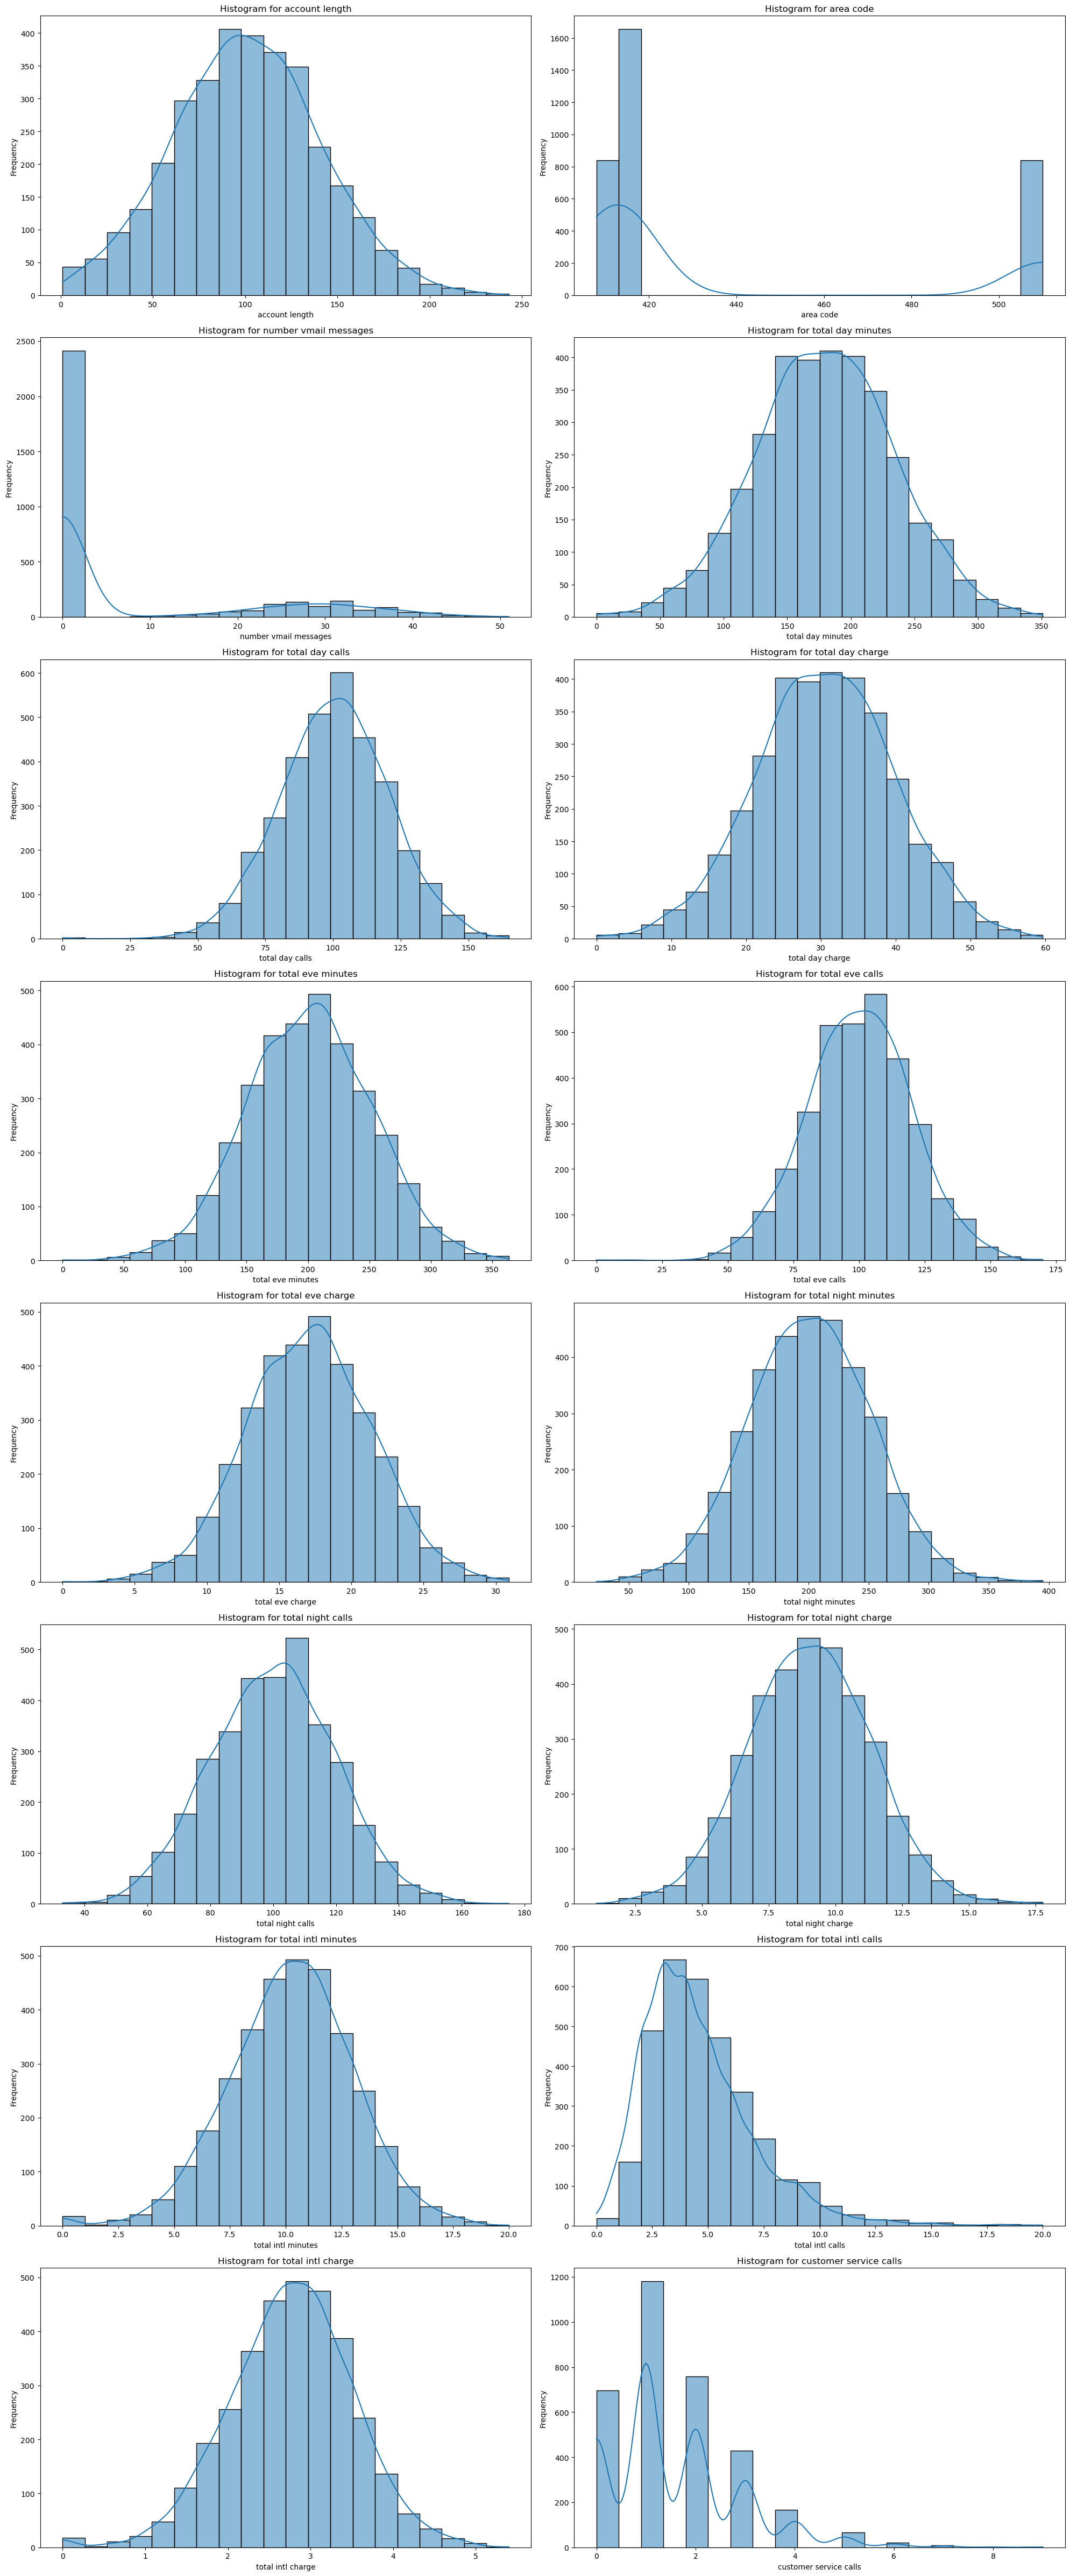

In [13]:
data_analysis.plot_histograms()



For the distribution plots of the numerical features above, all of them, except for 'customer service calls', 'area codes', and 'number of voicemail messages', exhibit a normal distribution. Although 'total international calls' appears to be skewed to the right, it generally maintains a normal distribution. The 'customer service calls' feature shows several peaks, indicating the presence of multiple modes within the population.

We check for skewness and standardize the data to improve the performance and reliability of machine learning models. Skewness indicates asymmetry in the data distribution, which can negatively impact model performance. By applying log transformation to highly skewed features, we make the distribution more symmetric. 

Standardizing the data ensures that all features have a mean of zero and a standard deviation of one, which helps in faster convergence and better performance of many machine learning algorithms, particularly those that rely on distance metrics eg KNN  or assume normally distributed data.

Data loaded successfully from bigml_59c28831336c6604c800002a.csv
Skewness removed and data standardized.


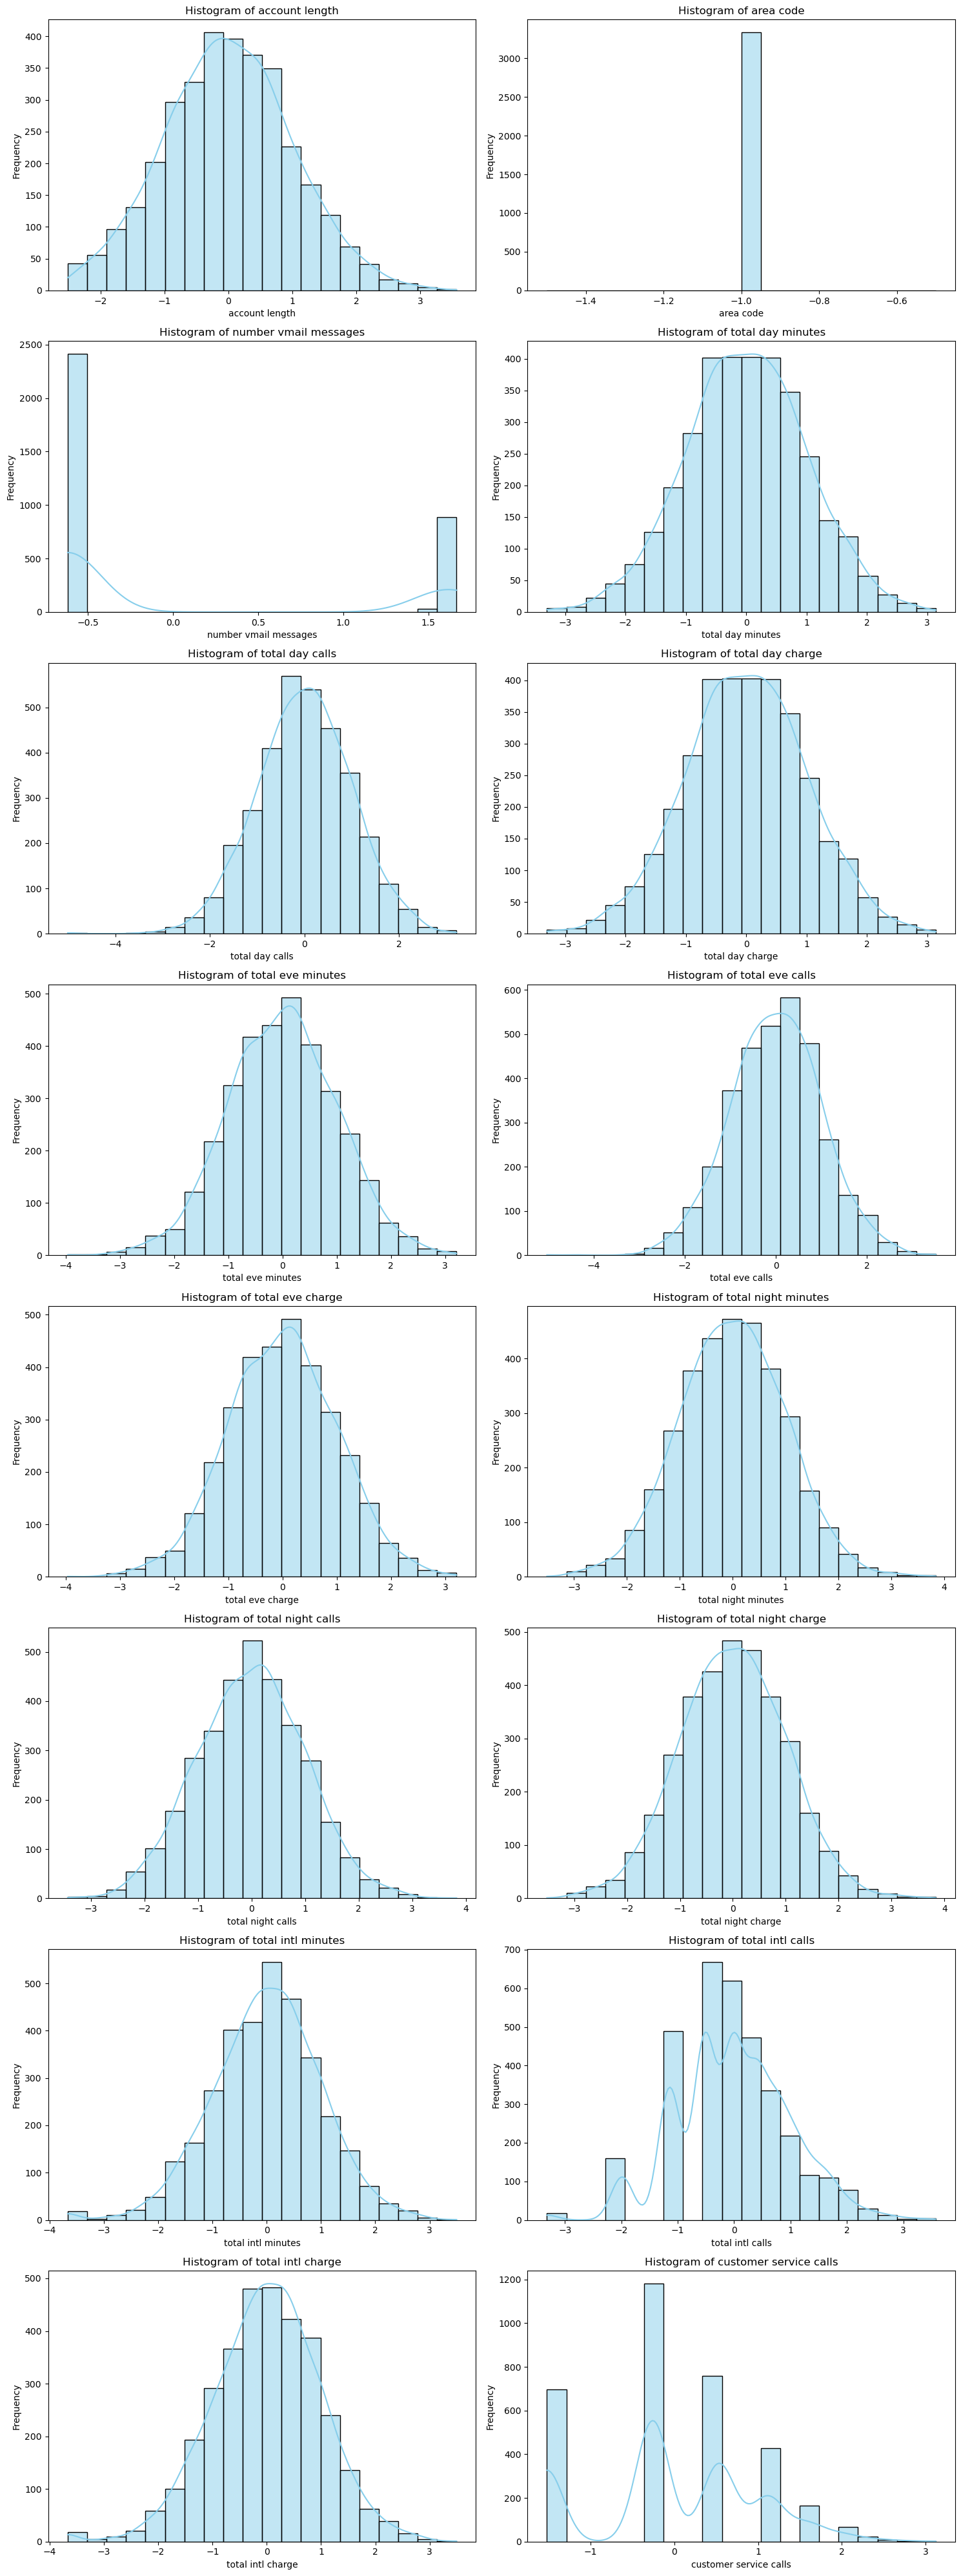

In [14]:

from scipy.stats import boxcox

class ClassNormalizeandRemoveSkewness(DataAnalysis):
    """
    A subclass of DataAnalysis for normalizing and removing skewness from numerical features.
    """

    def __init__(self, data):
        super().__init__(data)

    def boxcox_transform(self, columns):
        """
        Apply Box-Cox transformation to specified columns.

        Parameters:
        columns (list): List of column names to apply Box-Cox transformation.
        """
        for col in columns:
            transformed_data, _ = boxcox(self.data[col] + 1)  # Adding 1 to handle non-positive values
            self.data[col] = transformed_data

    def normalize_and_remove_skewness(self, threshold=1.0):
        """
        Check for skewness in numerical columns and perform Box-Cox transformation
        followed by standardization using StandardScaler.
        
        Parameters:
        threshold (float): The threshold value to determine skewness.
                           Columns with skewness greater than this threshold will be transformed.
        """
        numerical_cols = self.data.select_dtypes(include=['int64', 'float64']).columns
        skewed_cols = [col for col in numerical_cols if abs(self.data[col].skew()) > threshold]

        if len(skewed_cols) > 0:
            # Apply Box-Cox transformation to skewed columns
            self.boxcox_transform(skewed_cols)

            # Standardize the data using StandardScaler
            scaler = StandardScaler()
            self.data[numerical_cols] = scaler.fit_transform(self.data[numerical_cols])
            
            print("Skewness removed and data standardized.")
        else:
            print("No columns with skewness greater than the threshold found.")

    def plot_histograms(self):
        """
        Plot histograms for all numerical features after dealing with skewness and normalization.
        """
        numerical_cols = self.data.select_dtypes(include=['int64', 'float64']).columns
        num_plots = len(numerical_cols)
        num_cols = 2
        num_rows = (num_plots + 1) // 2

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))
        axes = axes.flatten()

        for i, col in enumerate(numerical_cols):
            sns.histplot(self.data[col], kde=True, color='skyblue', bins=20, ax=axes[i])
            axes[i].set_title(f'Histogram of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            
        plt.tight_layout()
        plt.show()


file_name = 'bigml_59c28831336c6604c800002a.csv'

loader = DataFrameLoader(file_name)
loader.load_data()

if loader.data is not None:
    analysis_with_normalization = ClassNormalizeandRemoveSkewness(loader.data)
    analysis_with_normalization.normalize_and_remove_skewness()
    analysis_with_normalization.plot_histograms()


Let's now do a univariate analysis of the categorical columns and see their dstribution

Data loaded successfully from bigml_59c28831336c6604c800002a.csv


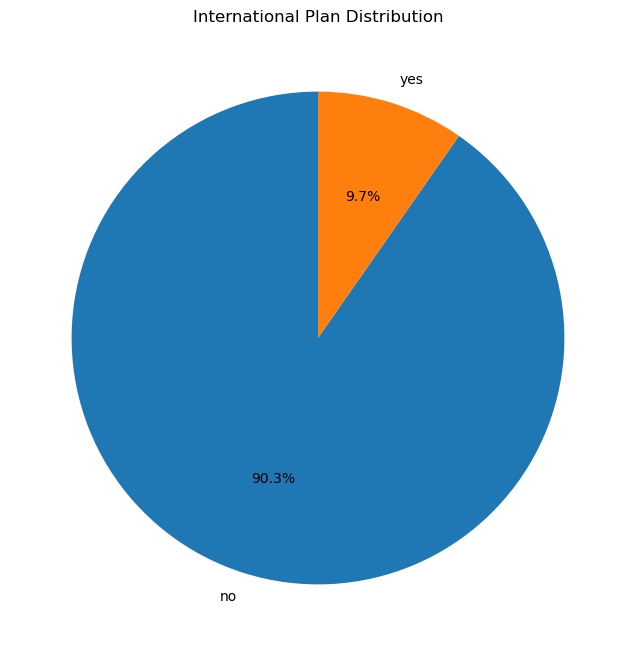

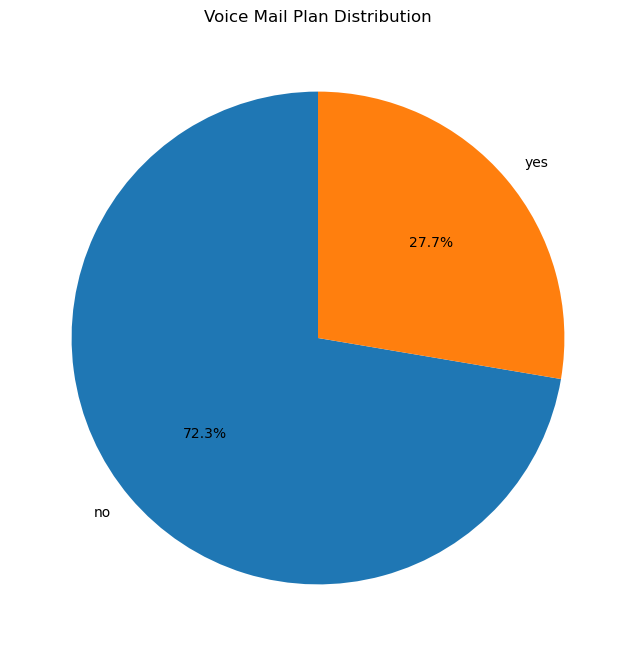

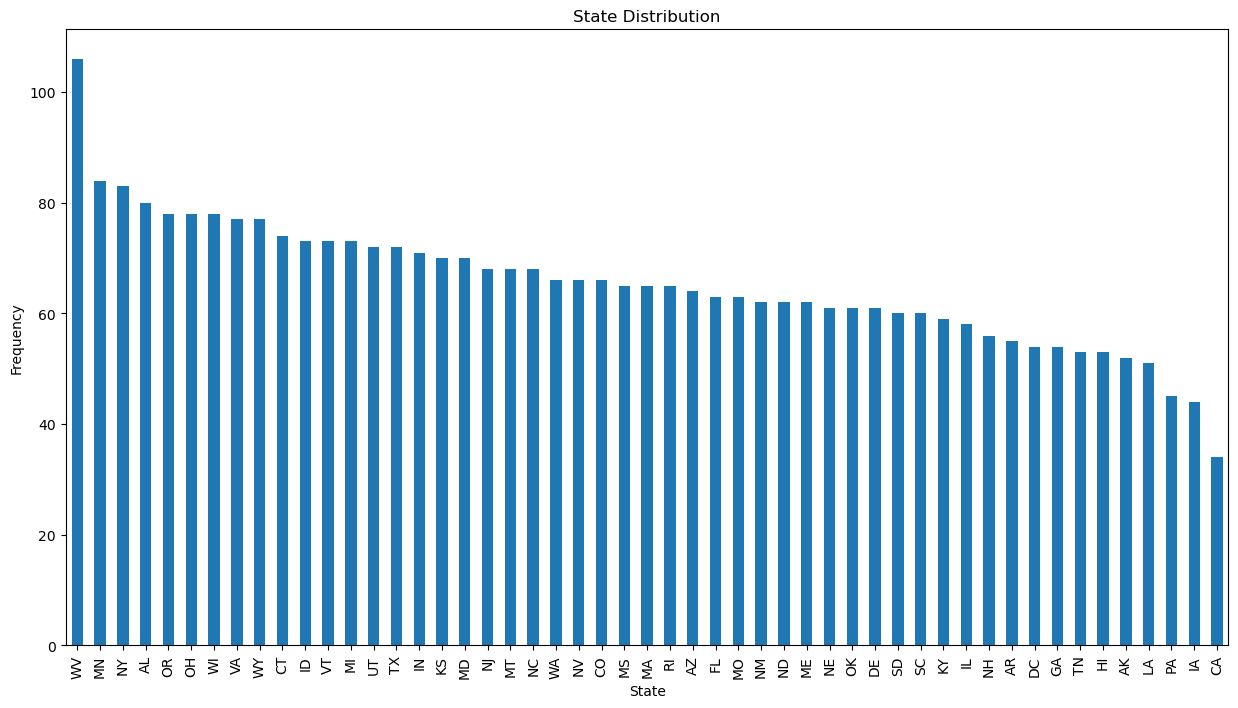

In [15]:


class CategoricalColumnPlotter:
    def __init__(self, data):
        """
        Initialize the CategoricalColumnPlotter object with the data to analyze.

        Parameters:
        data: The data to analyze.
        """
        self.data = data

    def plot_international_plan_pie_chart(self):
        """
        Plot a pie chart for the 'international_plan' column.
        """
        plt.figure(figsize=(8, 8))
        self.data['international plan'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title('International Plan Distribution')
        plt.ylabel('')
        plt.show()

    def plot_voice_mail_plan_pie_chart(self):
        """
        Plot a pie chart for the 'voice_mail_plan' column.
        """
        plt.figure(figsize=(8, 8))
        self.data['voice mail plan'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title('Voice Mail Plan Distribution')
        plt.ylabel('')
        plt.show()

    def plot_state_bar_chart(self):
        """
        Plot a bar chart for the 'state' column.
        """
        plt.figure(figsize=(15, 8))
        self.data['state'].value_counts().plot(kind='bar')
        plt.title('State Distribution')
        plt.xlabel('State')
        plt.ylabel('Frequency')
        plt.show()

file_name = 'bigml_59c28831336c6604c800002a.csv'
loader = DataFrameLoader(file_name)
loader.load_data()

if loader.data is not None:
    categorical_plotter = CategoricalColumnPlotter(loader.data)
    categorical_plotter.plot_international_plan_pie_chart()
    categorical_plotter.plot_voice_mail_plan_pie_chart()
    categorical_plotter.plot_state_bar_chart()



Inference from univariate analysis of the categorical columns:

around 91% of the people don't have the international plan

Around 72% of the people have no voice mail plan

Most of the customers are from West Virginia,Minnesota,NewYork,Alabama and Wisconsin

Since we have finished doing the univariate analysis of both the the numerical and the categorical variables, we can proceed to do the bi variate data analysis

BIVARIATE DATA ANALYSIS

Bivariate analysis entails examining the relationship between two variables. In our project, we investigate how each feature correlates with the target variable (customer churn) to comprehend their associations. This section delves into exploring the connections between pairs of variables in the dataset, shedding light on how changes in one variable correspond to changes in another.

Data loaded successfully from bigml_59c28831336c6604c800002a.csv


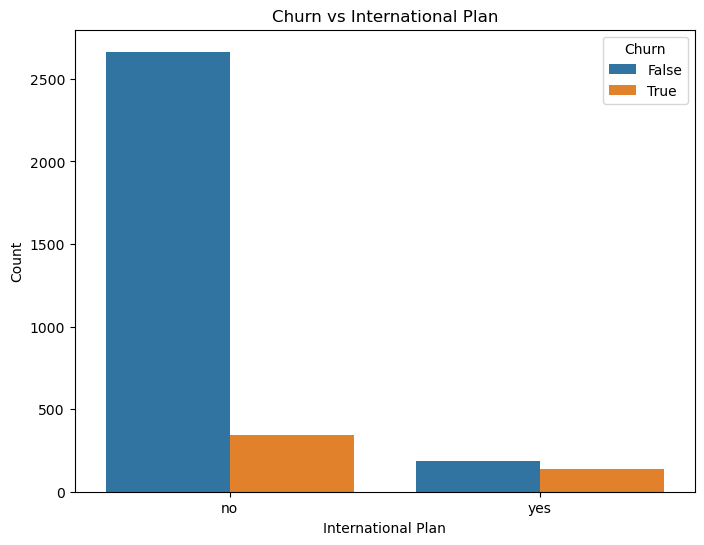

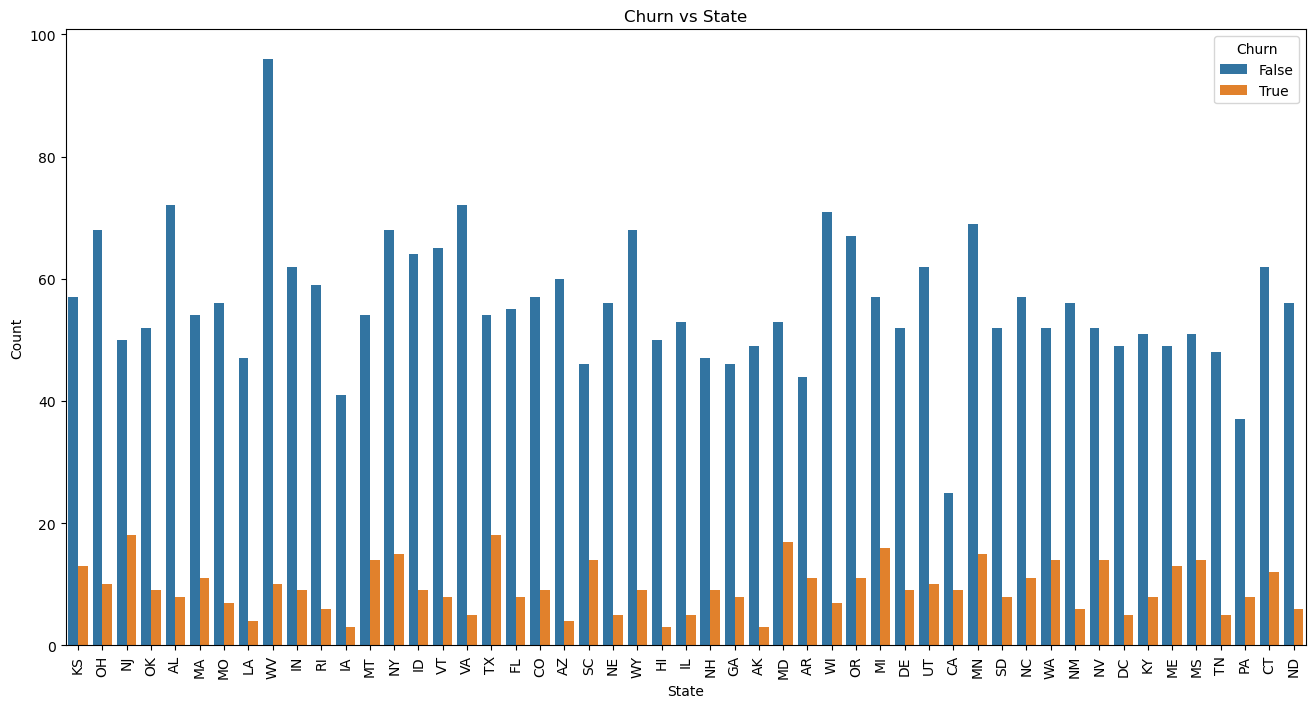

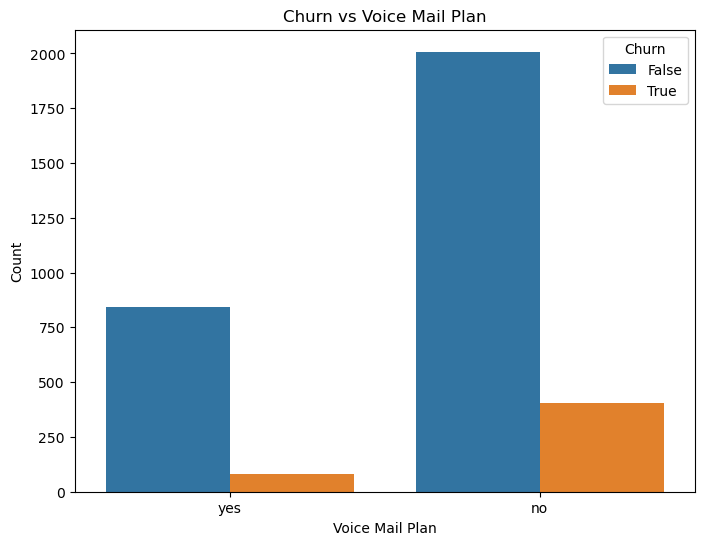

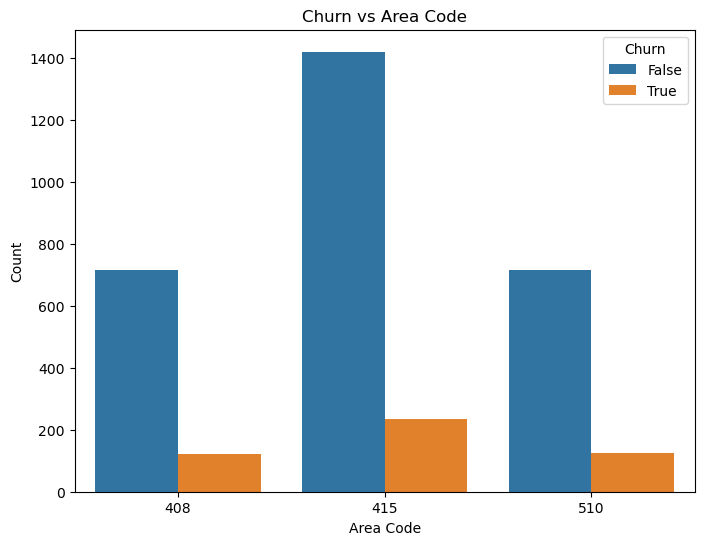

In [16]:


class ClassBivariate:
    """
    A class for performing bivariate analysis between 'churn' and other categorical columns.
    """

    def __init__(self, data):
        """
        Initialize the ClassBivariate object with the data to analyze.

        Parameters:
        data: The data to analyze.
        """
        self.data = data

    def plot_churn_international_plan(self):
        """
        Plot a bar plot between 'churn' and 'international plan'.
        """
        plt.figure(figsize=(8, 6))
        sns.countplot(x='international plan', hue='churn', data=self.data)
        plt.title('Churn vs International Plan')
        plt.xlabel('International Plan')
        plt.ylabel('Count')
        plt.legend(title='Churn', loc='upper right')
        plt.show()


    def plot_churn_voice_mail_plan(self):
        """
        Plot a bar plot between 'churn' and 'voice mail plan'.
        """
        plt.figure(figsize=(8, 6))
        sns.countplot(x='voice mail plan', hue='churn', data=self.data)
        plt.title('Churn vs Voice Mail Plan')
        plt.xlabel('Voice Mail Plan')
        plt.ylabel('Count')
        plt.legend(title='Churn', loc='upper right')
        plt.show()

    def plot_churn_state(self):
        """
        Plot a bar plot between 'churn' and 'state'.
        """
        plt.figure(figsize=(16, 8))
        sns.countplot(x='state', hue='churn', data=self.data)
        plt.title('Churn vs State')
        plt.xlabel('State')
        plt.ylabel('Count')
        plt.legend(title='Churn', loc='upper right')
        plt.xticks(rotation=90)
        plt.show()

    def plot_churn_area_code(self):
        """
        Plot a bar plot between 'churn' and 'area code'.
        """
        plt.figure(figsize=(8, 6))
        sns.countplot(x='area code', hue='churn', data=self.data)
        plt.title('Churn vs Area Code')
        plt.xlabel('Area Code')
        plt.ylabel('Count')
        plt.legend(title='Churn', loc='upper right')
        plt.show()



file_name = 'bigml_59c28831336c6604c800002a.csv'

loader = DataFrameLoader(file_name)
loader.load_data()

if loader.data is not None:
    bivariate_analysis = ClassBivariate(loader.data)
    bivariate_analysis.plot_churn_international_plan()
    bivariate_analysis.plot_churn_state()
    bivariate_analysis.plot_churn_voice_mail_plan()
    bivariate_analysis.plot_churn_area_code()


Inference from the bi variate analysis of the categorical columns with our target variable churn:

Of all the customers that churned, majority are from Texas, New Jersey, Maryland,Miami and NewYork.

The majority of customers who churned did not have an international plan.

The majority of customers who churned did not have an voicemail plan.

Of the customers who have terminated their account, most of them are from area codes 415 and 510

Let us do a bivariate analysis of churn against all the numerixal features. we will use pair plots for this 

Data loaded successfully from bigml_59c28831336c6604c800002a.csv


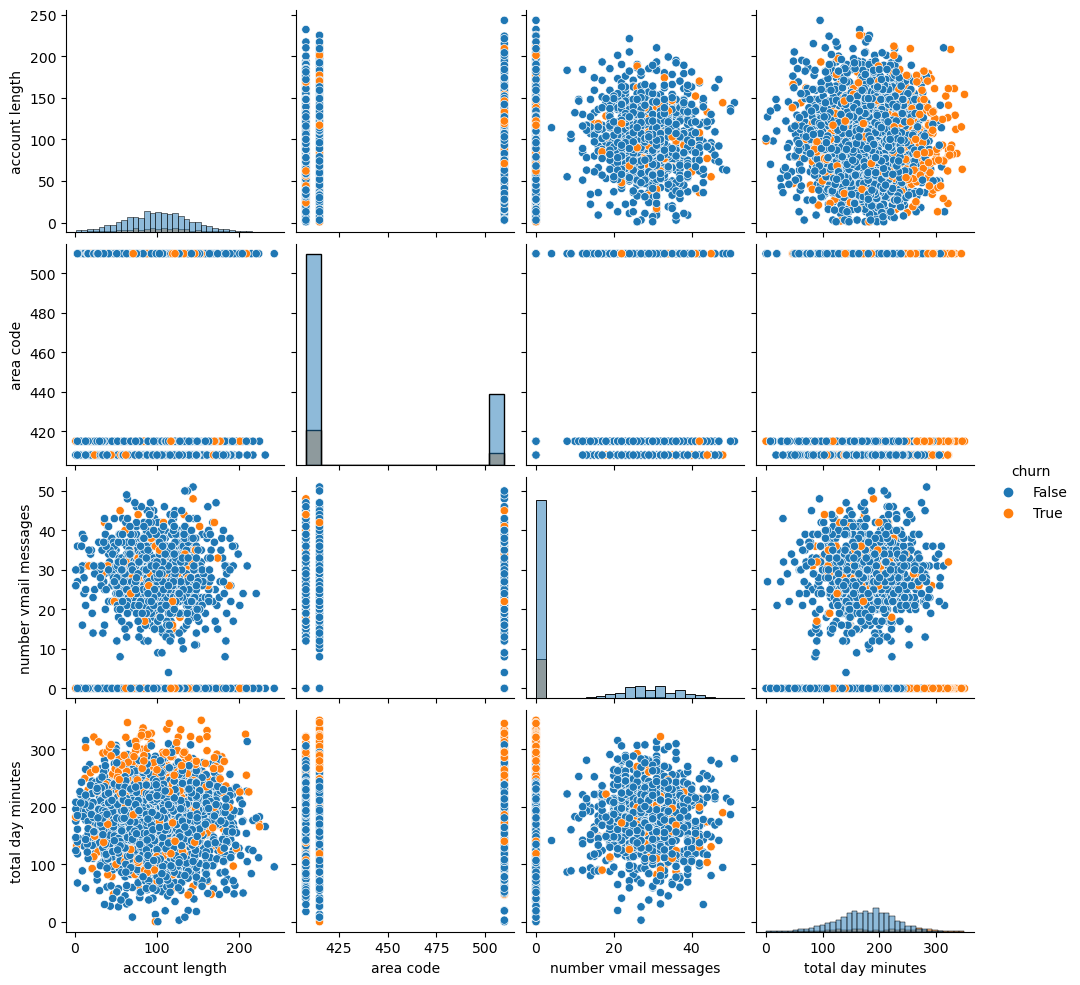

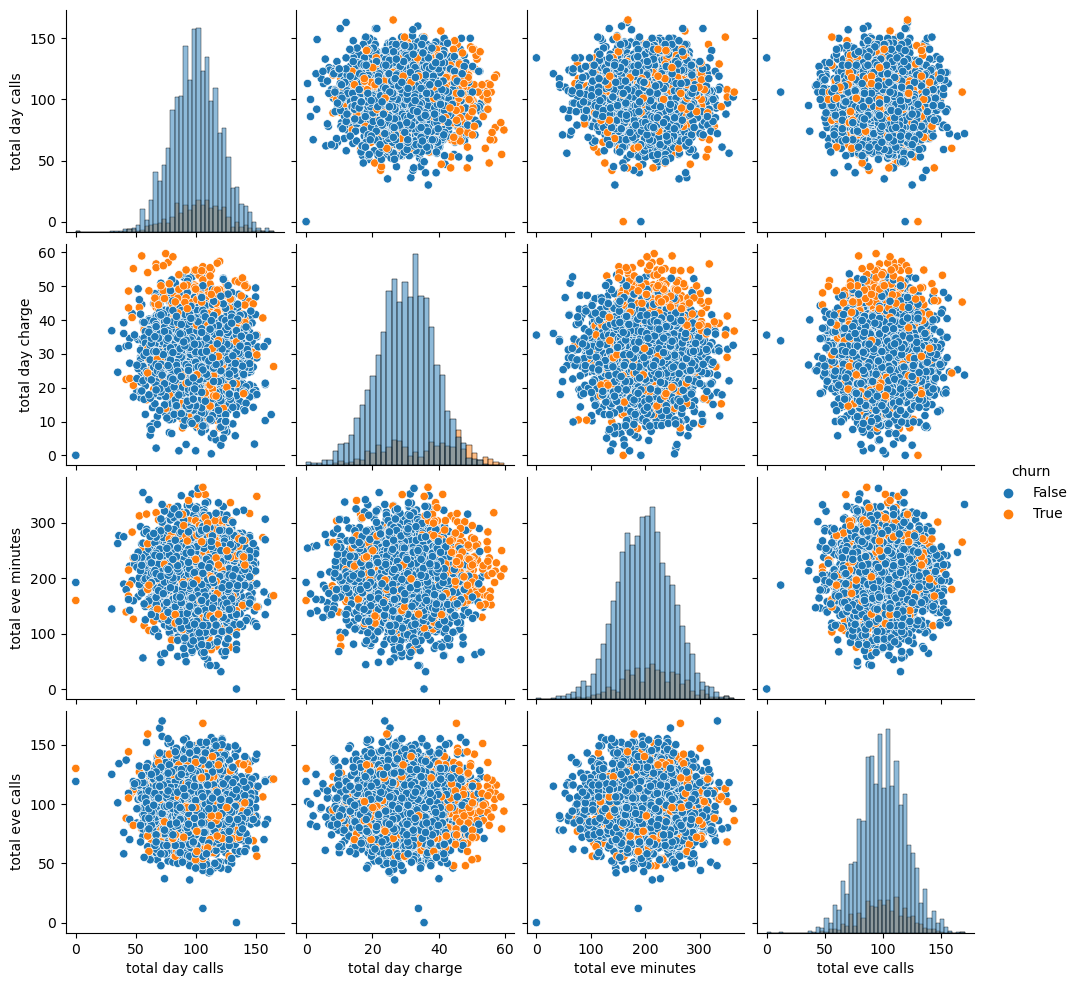

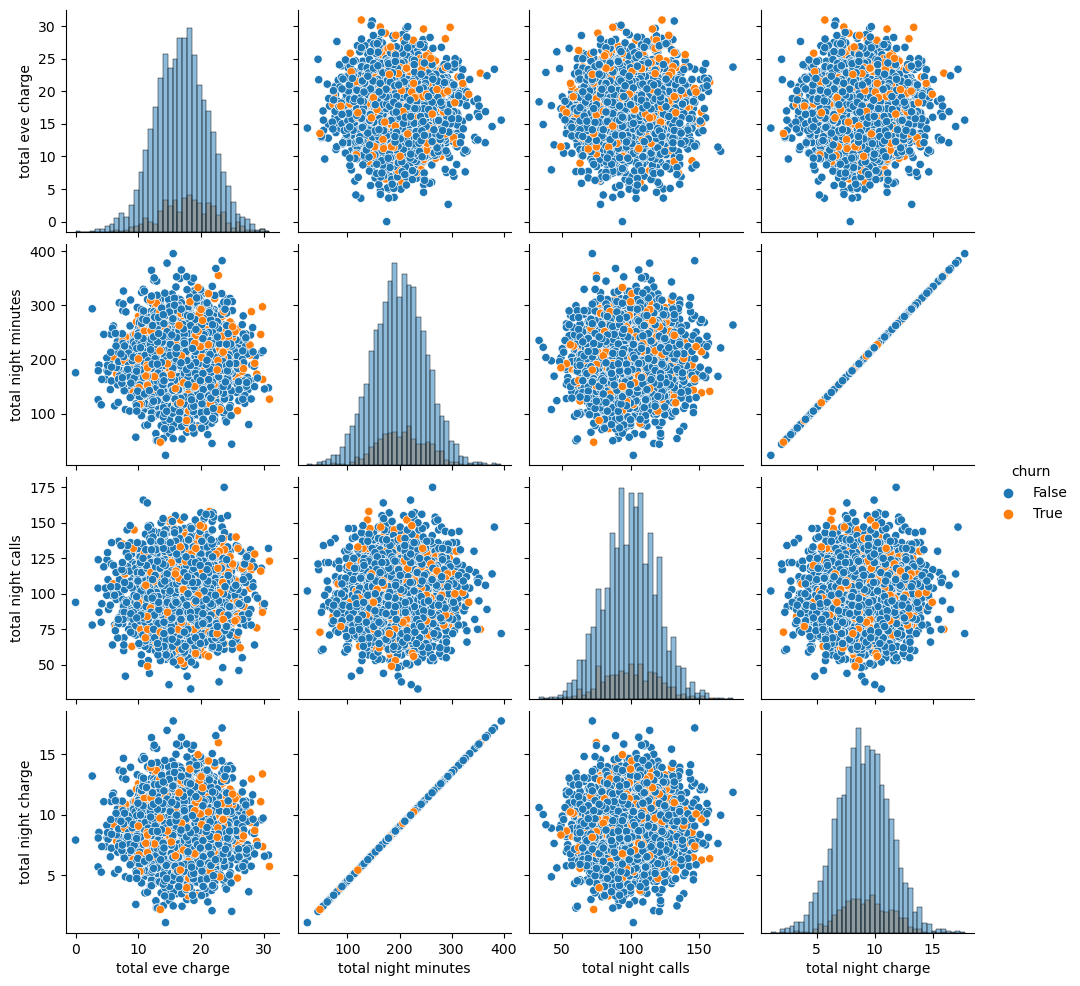

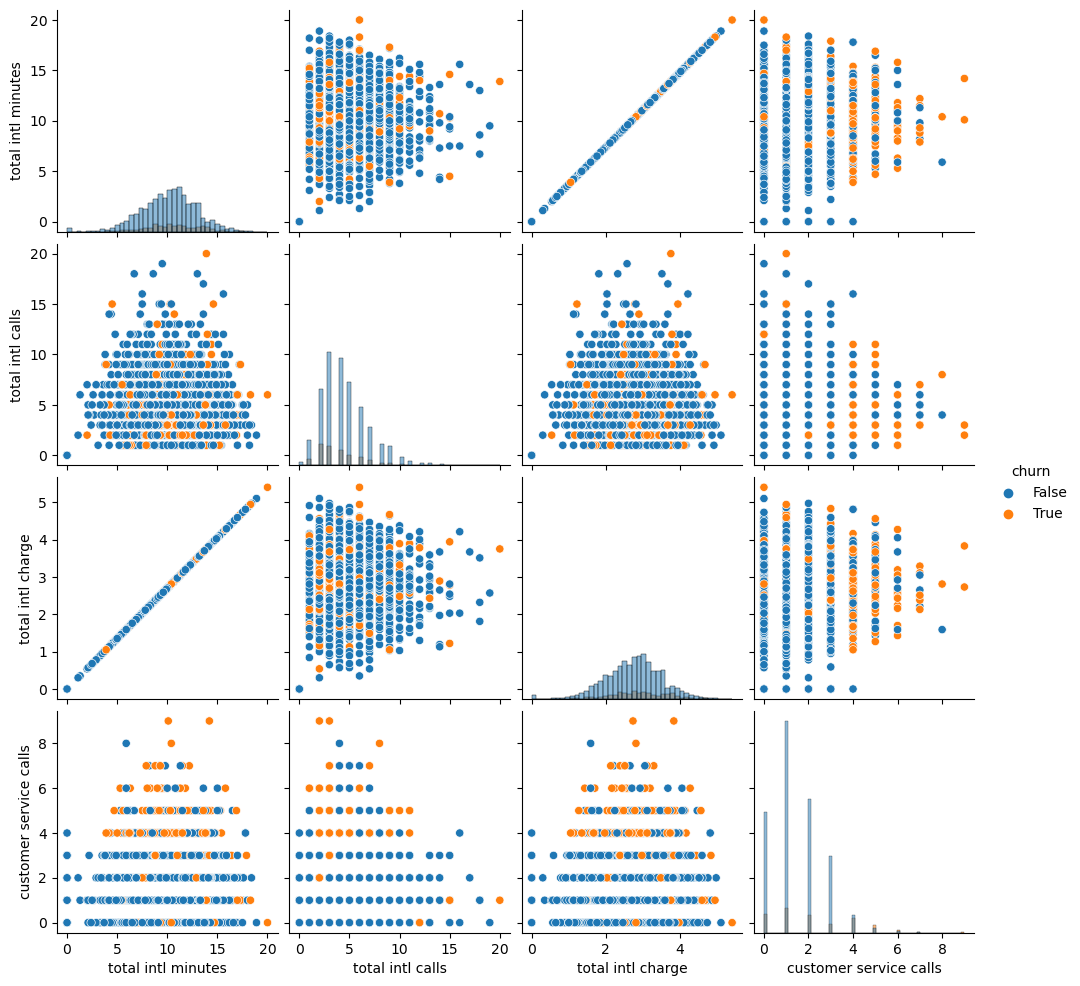

In [17]:


class ClassBivariateNumerical:
    """
    A class for performing bivariate analysis between 'churn' and numerical columns.
    """

    def __init__(self, data):
        """
        Initialize the ClassBivariateNumerical object with the data to analyze.

        Parameters:
        data : The data to analyze.
        """
        self.data = data

    def plot_pairplot_numerical(self):
        """
        Plot pair plots for numerical columns against 'churn'.
        """
        # Select numerical columns
        numerical_cols = self.data.select_dtypes(include=['int64', 'float64']).columns.tolist()

        # Divide numerical columns into sets of four
        for i in range(0, len(numerical_cols), 4):
            cols_subset = numerical_cols[i:i+4]
            cols_subset.append('churn')  # Include 'churn' column in the subset for plotting

            # Plot pair plots for the subset of columns
            sns.pairplot(self.data[cols_subset], hue='churn', diag_kind='hist')
            plt.show()


file_name =  'bigml_59c28831336c6604c800002a.csv'

loader = DataFrameLoader(file_name)
loader.load_data()

if loader.data is not None:
    bivariate_numerical_analysis = ClassBivariateNumerical(loader.data)
    bivariate_numerical_analysis.plot_pairplot_numerical()


There is a strong relationship between customer service calls and churn. After 4 calls, customers are more likely to discontinue the service, indicating dissatisfaction with customer service and unresolved issues. The pair plots show predictor variables have an even distribution with the target variable 'churn', suggesting their suitability for churn prediction modeling.

Before proceeding with model building, it is essential to identify and handle any potential outliers in the numerical features. Outliers can significantly influence the distribution of values and subsequently impact the feature engineering process and the performance of machine learning algorithms. Therefore, a thorough review of the numerical data columns will be conducted to detect and treat outliers, ensuring a more robust modeling process.               

By excluding outliers beyond 3 standard deviations, we improve our models' ability to generalize patterns and make more accurate predictions on unseen data.

Let's check the outliers in the numerical columns and plot them by calling the check outliers function.

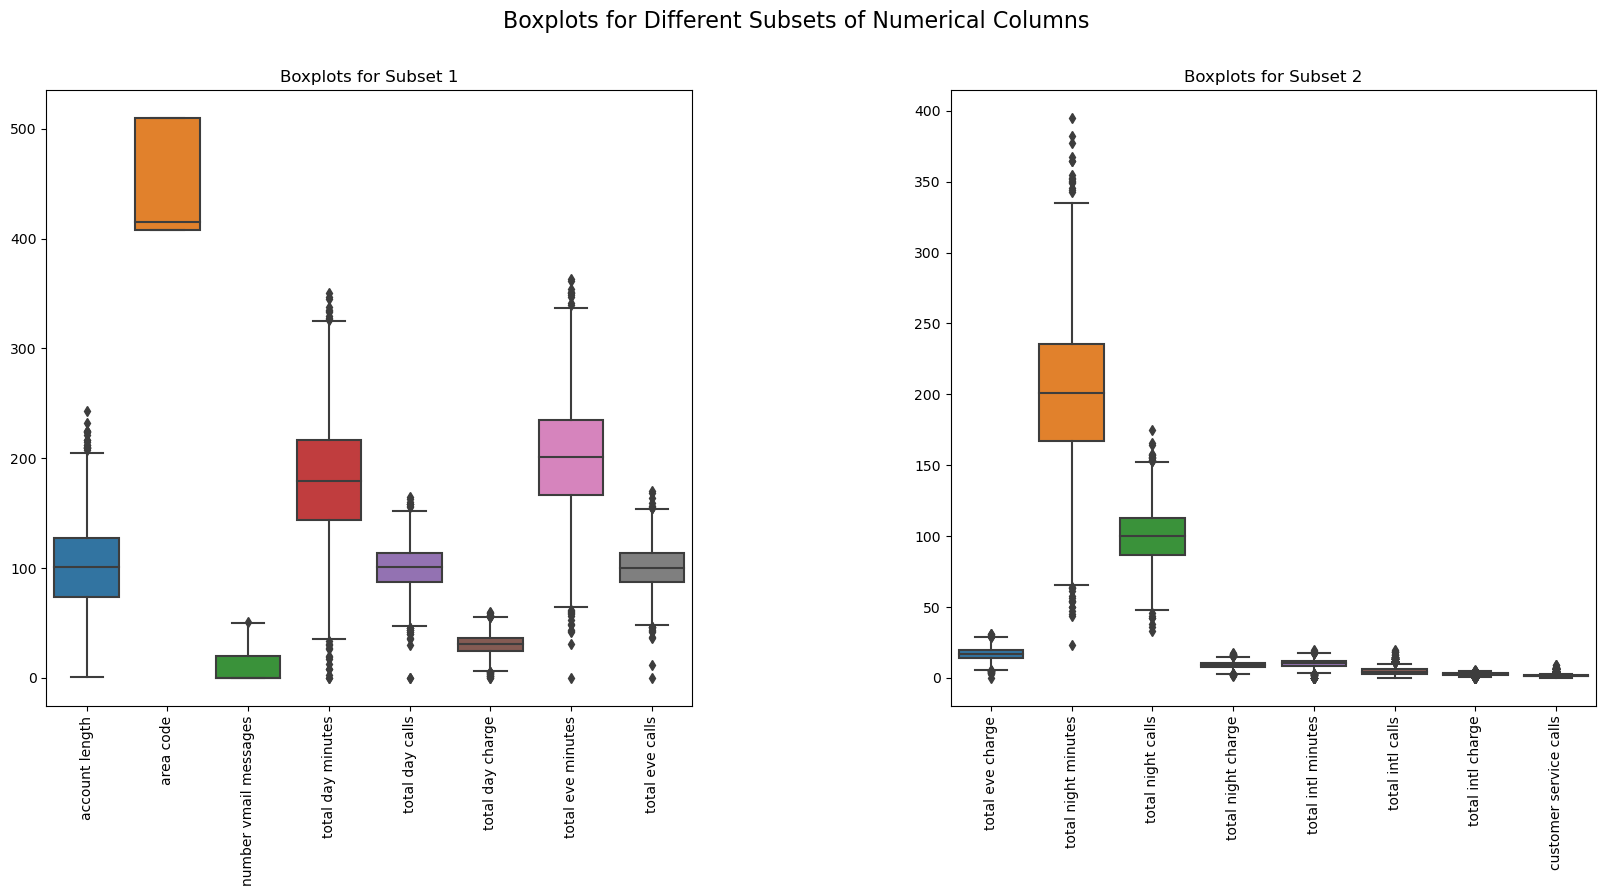

In [18]:
#before dealing with skewness, standardisation
data_analysis.check_outliers()

Data loaded successfully from bigml_59c28831336c6604c800002a.csv


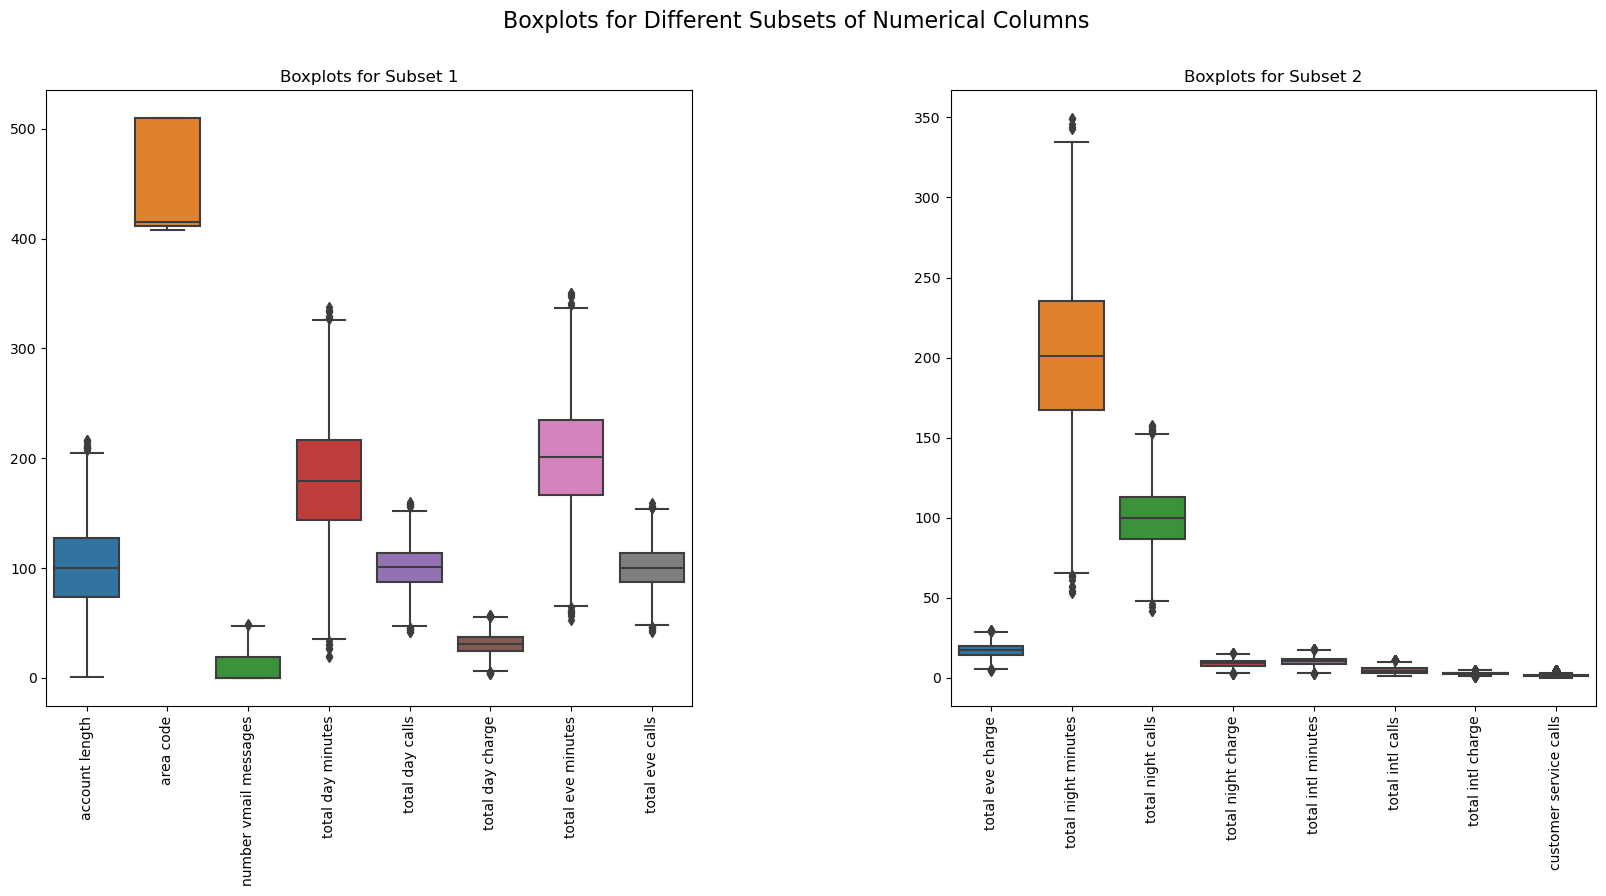

In [19]:


class ClassOutlierRemoval(ClassNormalizeandRemoveSkewness):
    """
    A subclass for removing outliers in numerical columns.
    """

    def remove_outliers(self):
        """
        Remove outliers in numerical columns if they are above 3 standard deviations.
        """
        # Select numerical columns
        numerical_cols = self.data.select_dtypes(include=['int64', 'float64']).columns.tolist()

        # Iterate over numerical columns
        for col in numerical_cols:
            # Calculate the z-score for each data point
            z_scores = np.abs((self.data[col] - self.data[col].mean()) / self.data[col].std())

            # Drop rows with z-scores above 3 standard deviations
            self.data = self.data[z_scores < 3]


file_name = 'bigml_59c28831336c6604c800002a.csv'

loader = DataFrameLoader(file_name)
loader.load_data()

if loader.data is not None:
    analysis_with_outlier_removal = ClassOutlierRemoval(loader.data)
    analysis_with_outlier_removal.remove_outliers()
    # Visualize outliers after removal
    analysis_with_outlier_removal.check_outliers()
    

Now that we have dealt with outliers and finished the bi variate analysis we can perform a multivariate analysis using a correlation heat map

MULTIVARIATE ANALYSIS
Multivariate analysis involves analyzing the relationship between multiple variables simultaneously. In this case, we explore the relationship between multiple features and the target variable (customer churn) to understand how they are related when considered together.

I used a correlation matrix to identify the correlation between different variables in the dataset.

Data loaded successfully from bigml_59c28831336c6604c800002a.csv


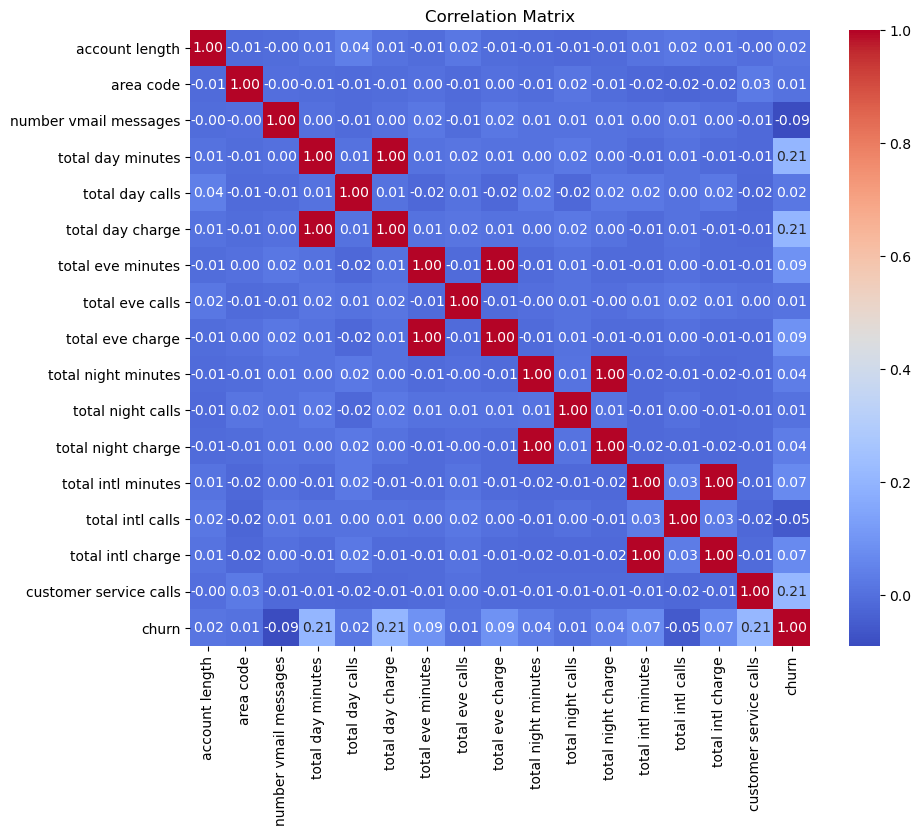

In [20]:
class ClassOutlierRemoval(ClassNormalizeandRemoveSkewness):
    """
    A subclass for removing outliers in numerical columns.
    """

    def correlation_matrix(self):
        """
        Create and visualize the correlation matrix.
        """
        # Calculate the correlation matrix
        corr_matrix = self.data.corr()

        # Plot the correlation matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
        plt.title('Correlation Matrix')
        plt.show()


file_name = 'bigml_59c28831336c6604c800002a.csv'

loader = DataFrameLoader(file_name)
loader.load_data()

if loader.data is not None:
    analysis_with_outlier_removal = ClassOutlierRemoval(loader.data)
    # Create and visualize the correlation matrix
    analysis_with_outlier_removal.correlation_matrix()


based on the correlation matrix provide we can make the following inferences:

There is a strong positive correlation (0.99) between total_day_charge and total_day_minutes, indicating potential multicollinearity between these variables.

Similarly, total_eve_charge and total_eve_minutes have a strong positive correlation (0.99), suggesting potential multicollinearity.

total_night_charge, total_night_minutes, and total_night_calls also exhibit strong positive correlations among themselves, indicating possible multicollinearity.

total_intl_charge and total_intl_minutes have a strong positive correlation (0.99), suggesting potential multicollinearity.

It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used

The correlation between customer_service_calls and churn (0.21) is relatively low compared to other variables, indicating that this variable may not be a strong predictor of churn.

Most variables have low to moderate correlations with churn, except for total_day_minutes, total_day_calls, total_eve_minutes, total_eve_calls, total_night_minutes, total_night_calls, total_intl_minutes, and total_intl_calls, which exhibit slightly higher correlations (around 0.2).

It's important to note that while high correlations between predictor variables may indicate multicollinearity, it's not a definitive test. The VIF test provides a more robust measure of multicollinearity by considering the combined effect of all predictor variables.

Let's deal with multicollinearity 

DEALING WITH MULTICOLLINEARITY we'll use the VIF method.  

The VIF quantifies the severity of multicollinearity in a regression analysis. 
To interpret the VIF values:

VIF < 5: No multicollinearity issue

5 < VIF < 10: Moderate multicollinearity

VIF > 10: Severe multicollinearity

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
class ClassMulticollinearity(ClassOutlierRemoval):
    """
    A subclass of ClassOutlierRemoval for dealing with multicollinearity in numerical features.
    """

    def __init__(self, data):
        super().__init__(data)

    def calculate_vif(self):
        """
        Calculate Variance Inflation Factor (VIF) for each numerical feature to detect multicollinearity.
        """
        # Ensure all columns are numeric and handle missing values
        numeric_data = self.data.select_dtypes(include=[np.number]).fillna(0)
        if 'churn' in numeric_data.columns:
            X = numeric_data.drop('churn', axis=1)
        else:
            X = numeric_data

        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

        print(vif_data)
        return vif_data


file_name = 'bigml_59c28831336c6604c800002a.csv'

loader = DataFrameLoader(file_name)
loader.load_data()

if loader.data is not None:
    analysis_with_normalization = ClassMulticollinearity(loader.data)
    vif_data = analysis_with_normalization.calculate_vif()

Data loaded successfully from bigml_59c28831336c6604c800002a.csv
                   feature           VIF
0           account length  7.293103e+00
1                area code  6.102501e+01
2    number vmail messages  1.351056e+00
3        total day minutes  1.246034e+08
4          total day calls  2.361747e+01
5         total day charge  1.246078e+08
6        total eve minutes  3.741752e+07
7          total eve calls  2.375305e+01
8         total eve charge  3.741886e+07
9      total night minutes  1.071952e+07
10       total night calls  2.460108e+01
11      total night charge  1.071916e+07
12      total intl minutes  9.975354e+05
13        total intl calls  4.273501e+00
14       total intl charge  9.979114e+05
15  customer service calls  2.402765e+00


Here's an interpretation of the VIF values: 


account_length: VIF = 7.293103. This value is slightly above 5, indicating a moderate level of multicollinearity.

area_code: VIF = 61.02501. This value is significantly greater than 10, suggesting a severe multicollinearity issue with this variable.

number_vmail_messages: VIF = 1.351056. This value is below 5, indicating no significant multicollinearity problem.

total_day_minutes: VIF = 1.246034e+08 (124603400). This extremely high VIF value indicates severe multicollinearity.

total_day_calls: VIF = 23.61747. This value is above 10, suggesting a severe multicollinearity issue.

total_day_charge: VIF = 1.246078e+08 (124607800). Similar to total_day_minutes, this extremely high VIF value indicates severe multicollinearity.

total_eve_minutes: VIF = 37417520. This extremely high VIF value indicates severe multicollinearity.

total_eve_calls: VIF = 23.75305. This value is above 10, suggesting a severe multicollinearity issue.

total_eve_charge: VIF = 37418860. This extremely high VIF value indicates severe multicollinearity.

total_night_minutes: VIF = 10719520. This extremely high VIF value indicates severe multicollinearity.

total_night_calls: VIF = 24.60108. This value is above 10, suggesting a severe multicollinearity issue.

total_night_charge: VIF = 10719160. This extremely high VIF value indicates severe multicollinearity.

total_intl_minutes: VIF = 997535.4. This extremely high VIF value indicates severe multicollinearity.

total_intl_calls: VIF = 4.273501. This value is below 5, indicating no significant multicollinearity problem.

total_intl_charge: VIF = 997911.4. This extremely high VIF value indicates severe multicollinearity.

customer_service_calls: VIF = 2.402765. This value is below 5, indicating no significant multicollinearity problem.


These variables are highly correlated with one another, which can cause instability and unreliable estimates in regression models.
we will Apply PCA for dimensionality reduction as opposed to dropping the features as that would not be ideal to me our ML model



PCA interpretation   
These coefficients or loadings indicate the importance of each original variable in the construction of the principal components. Higher absolute values of the coefficients indicate a stronger contribution of that original variable to the corresponding principal component.
For example, in the case of PC1 (the first principal component):

The first original variable (row 0) has a high negative loading (-87.794384), indicating a strong negative contribution to PC1.

Basic Data Preprocessing

In this section, we proprocess the data to prepare it for modelling. In the dataset, we have categorical and numeric data columns, some of which must be tranformed into a datatype acceptable by the different machine learning models used in the modelling section.


A good example would be using one-hot encoding to transform categorical columns with object datatypes to numerical ones, especially 1s and 0s


The dataset must also be split into different sets, the training and testing sets. We will use the training set to train the different models and evaluate the performance using the test data. Cross-validation is used.


We also drop features that have minimal or no effect on the target variable

In [181]:
from sklearn.decomposition import PCA

class ClassMulticollinearity(ClassOutlierRemoval):
    """
    A subclass of ClassOutlierRemoval for dealing with multicollinearity in numerical features.
    """

    def __init__(self, data):
        super().__init__(data)

    def apply_pca(self, n_components):
        """
        Apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset.
        """
        # Ensure all columns are numeric and handle missing values
        numeric_data = self.data.select_dtypes(include=[np.number]).fillna(0)
        if 'churn' in numeric_data.columns:
            X = numeric_data.drop('churn', axis=1)
        else:
            X = numeric_data

        #  data is already scaled
        pca = PCA(n_components=n_components)
        principal_components = pca.fit_transform(X)

        pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
        print("PCA Components:")
        print(pca_df.head())
        return pca_df


file_name = 'bigml_59c28831336c6604c800002a.csv'

loader = DataFrameLoader(file_name)
loader.load_data()

if loader.data is not None:
    analysis_with_normalization = ClassMulticollinearity(loader.data)
    
    # Apply PCA
    transformed_df = analysis_with_normalization.apply_pca(n_components=5)


Data loaded successfully from bigml_59c28831336c6604c800002a.csv
PCA Components:
          PC1         PC2        PC3        PC4        PC5
0  -87.794384   29.766615  30.392800 -22.895742  24.889857
1   16.930382   34.729188  42.283385 -22.368371   5.349360
2  -61.160667   47.126676 -79.727502 -24.318737  31.488136
3 -115.484155  116.109431 -85.482210 -23.524827 -23.797563
4   15.217286   36.397111 -39.685946 -19.262653 -28.638341


In [85]:
transformed_df.shape

(3333, 5)

In [26]:
df_loader.get_head()

state  account length  area code international plan  \
phone number                                                       
382-4657        KS             128        415                 no   
371-7191        OH             107        415                 no   
358-1921        NJ             137        415                 no   
375-9999        OH              84        408                yes   
330-6626        OK              75        415                yes   

             voice mail plan  number vmail messages  total day minutes  \
phone number                                                             
382-4657                 yes                     25              265.1   
371-7191                 yes                     26              161.6   
358-1921                  no                      0              243.4   
375-9999                  no                      0              299.4   
330-6626                  no                      0              166.7   

              total day calls  total day charge  total eve minutes  \
phone number                                                         
382-4657                  110             45.07              197.4   
371-7191                  123             27.47              195.5   
358-1921                  114             41.38              121.2   
375-9999                   71             50.90               61.9   
330-6626                  113             28.34              148.3   

              total eve calls  total eve charge  total night minutes  \
phone number                                                           
382-4657                   99             16.78                244.7   
371-7191                  103             16.62                254.4   
358-1921                  110             10.30                162.6   
375-9999                   88              5.26                196.9   
330-6626                  122             12.61                186.9   

              total night calls  total night charge  total intl minutes  \
phone number                                                              
382-4657                     91               11.01                10.0   
371-7191                    103               11.45                13.7   
358-1921                    104                7.32                12.2   
375-9999                     89                8.86                 6.6   
330-6626                    121                8.41                10.1   

              total intl calls  total intl charge  customer service calls  \
phone number                                                                
382-4657                     3               2.70                       1   
371-7191                     3               3.70                       1   
358-1921                     5               3.29                       0   
375-9999                     7               1.78                       2   
330-6626                     3               2.73                       3   

              churn  
phone number         
382-4657      False  
371-7191      False  
358-1921      False  
375-9999      False  
330-6626      False

In [139]:
##we have isolated the churn collumn only and named it df
df = df_loader.data

# Keep only the churn column
df = df[['churn']]
df.head()


churn
phone number       
382-4657      False
371-7191      False
358-1921      False
375-9999      False
330-6626      False

let us transform it to 0's and 1's

In [140]:
df['churn'] = df['churn'].astype(int)
df

churn
phone number       
382-4657          0
371-7191          0
358-1921          0
375-9999          0
330-6626          0
...             ...
414-4276          0
370-3271          0
328-8230          0
364-6381          0
400-4344          0

[3333 rows x 1 columns]

In [141]:
df.index.name
# Remove the index name and values
df.index.name = None
df.reset_index(drop=True, inplace=True)

print(df)


      churn
0         0
1         0
2         0
3         0
4         0
...     ...
3328      0
3329      0
3330      0
3331      0
3332      0

[3333 rows x 1 columns]


One-Hot Encoding

One-Hot Encoding is a technique used to convert categorical variables into binary (0 or 1) features. This is achieved by creating a new binary feature for each category of the original categorical feature. Each binary feature represents the presence (1) or absence (0) of the specific category. This transformation allows categorical data to be used effectively in machine learning models.

In [142]:



# df_loader.data is your DataFrame
df_orig = df_loader.data

# Isolate the specified columns
selected_columns = ['state', 'area code', 'international plan', 'voice mail plan']
df_selected = df_orig[selected_columns]

print(df_selected)

# Perform one-hot encoding
df_encd = pd.get_dummies(df_selected, columns=['state', 'international plan', 'voice mail plan'])

print(df_encd)






         state  area code international plan voice mail plan
382-4657    KS        415                 no             yes
371-7191    OH        415                 no             yes
358-1921    NJ        415                 no              no
375-9999    OH        408                yes              no
330-6626    OK        415                yes              no
...        ...        ...                ...             ...
414-4276    AZ        415                 no             yes
370-3271    WV        415                 no              no
328-8230    RI        510                 no              no
364-6381    CT        510                yes              no
400-4344    TN        415                 no             yes

[3333 rows x 4 columns]
          area code  state_AK  state_AL  state_AR  state_AZ  state_CA  \
382-4657        415         0         0         0         0         0   
371-7191        415         0         0         0         0         0   
358-1921        415     

In [143]:
df_encd.shape

(3333, 56)

In [144]:
#drop the phone number as the index on our encoded variables so as to merge with df which contains our target variable and the df with pca components for modelling
# Reset index and drop index values
df_encd.reset_index(drop=True, inplace=True)

print(df_encd)


      area code  state_AK  state_AL  state_AR  state_AZ  state_CA  state_CO  \
0           415         0         0         0         0         0         0   
1           415         0         0         0         0         0         0   
2           415         0         0         0         0         0         0   
3           408         0         0         0         0         0         0   
4           415         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
3328        415         0         0         0         1         0         0   
3329        415         0         0         0         0         0         0   
3330        510         0         0         0         0         0         0   
3331        510         0         0         0         0         0         0   
3332        415         0         0         0         0         0         0   

      state_CT  state_DC  state_DE  ...  state_VA  

In [145]:


# Concatenate the DataFrames
merged_df = pd.concat([df, transformed_df, df_encd], axis=1)

# Print the shape
print("Shape of concatenated DataFrame:", merged_df.shape)


Shape of concatenated DataFrame: (3333, 62)


In [146]:
merged_df.columns

Index(['churn', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'area code', 'state_AK',
       'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI',
       'state_WV', 'state_WY', 'international plan_no',
       'international plan_yes', 'voice mail plan_no', 'voice mail plan_yes'],
      dtype='object')

MODELLING

We begin by constructing multiple models, evaluating their performance, and subsequently engaging in hyper-parameter tuning to enhance their effectiveness. Our primary objective is to identify the model and parameter configurations that yield the most favorable outcomes.

We proceed with the training and evaluation of the following models:

1. Logistic Regression Model,

2. K-Nearest Neighbors,

3. Decision Trees


My dataset constitutes a classification task. The inclusion of the 'churn' column, often denoting whether a customer has churned or not, (a binary outcome), suggests that the objective involves categorizing customers into two groups: those who have churned and those who have not


We will evaluate the performance of our models using the ROC_AUC metric.

To address class imbalance, we will employ SMOTE to generate synthetic examples of the minority class in our dataset.

Let's seperate the variables (x and y).
we non't scale again since we already did that in EDA

In [150]:
y = merged_df['churn']
X= merged_df.drop('churn', axis=1)

In [151]:
#split data into test and split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

model 1 -LOGISTIC REGRESSION 

I had noticed some class imbalance. we will deal with it using SMOTE TECHNIQUE.
SMOTE  generates synthetic samples for the minority class in a dataset to address class imbalance. It creates new instances by interpolating between existing minority class samples, enhancing the representation of the minority class and improving the performance of machine learning models.

In [154]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Create a pipeline that includes SMOTE and the logistic regression model
model_pipeline = Pipeline(steps=[
    ('smote', smote),            # Apply SMOTE
    ('classifier', logreg_model)  # Logistic Regression model
])

# Fit the model on the training data
model_pipeline.fit(X_train, y_train)

# Predict churn for the train and test data
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Calculate the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
# Print the train and test scores
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report for test data
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix for test data
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))


Train Accuracy: 0.88
Test Accuracy: 0.87
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       857
           1       0.57      0.37      0.45       143

    accuracy                           0.87      1000
   macro avg       0.74      0.66      0.69      1000
weighted avg       0.85      0.87      0.86      1000

Confusion Matrix (Test Data):
[[817  40]
 [ 90  53]]


Train Accuracy (0.88):

The model correctly classified 88% of the training data.

Test Accuracy (0.87):

The model correctly classified 87% of the test data, indicating good generalization from training to unseen data.

Classification Report:


Precision:

For class 0 (non-churn): 0.90 (90% of predicted non-churn cases are correct).

For class 1 (churn): 0.57 (57% of predicted churn cases are correct).

Recall:


For class 0 (non-churn): 0.95 (95% of actual non-churn cases are identified).

For class 1 (churn): 0.37 (37% of actual churn cases are identified).

F1-Score:

For class 0 (non-churn): 0.93 (harmonic mean of precision and recall).

For class 1 (churn): 0.45 (harmonic mean of precision and recall).

Support:

Number of actual occurrences for each class (857 for non-churn, 143 for churn).

Confusion Matrix:

True Negative (TN): 817 (Non-churn correctly predicted as non-churn).

False Positive (FP): 40 (Non-churn incorrectly predicted as churn).

False Negative (FN): 90 (Churn incorrectly predicted as non-churn).

True Positive (TP): 53 (Churn correctly predicted as churn).


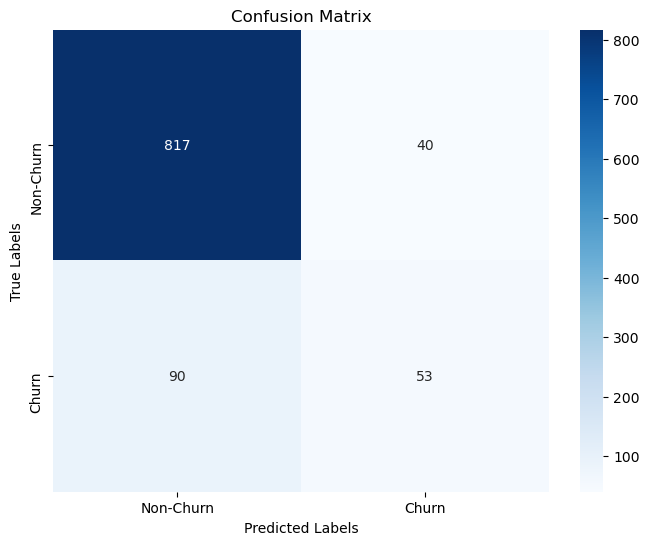

In [161]:


def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plot a confusion matrix using seaborn heatmap.

    Parameters:
    y_true (list or array): Array of true labels.
    y_pred (list or array): Array of predicted labels.
    labels: List of labels to display on the axes.

    Returns:
    None
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()



#lot the confusion matrix
plot_confusion_matrix(y_test, y_test_pred, labels= ['Non-Churn', 'Churn'])




The confusion matrix shows a significant class imbalance, with far more non-churn cases than churn cases. This can lead to the model being biased towards the majority class.

Lets now plot an ROC AUC curve to further visualize and understand our data

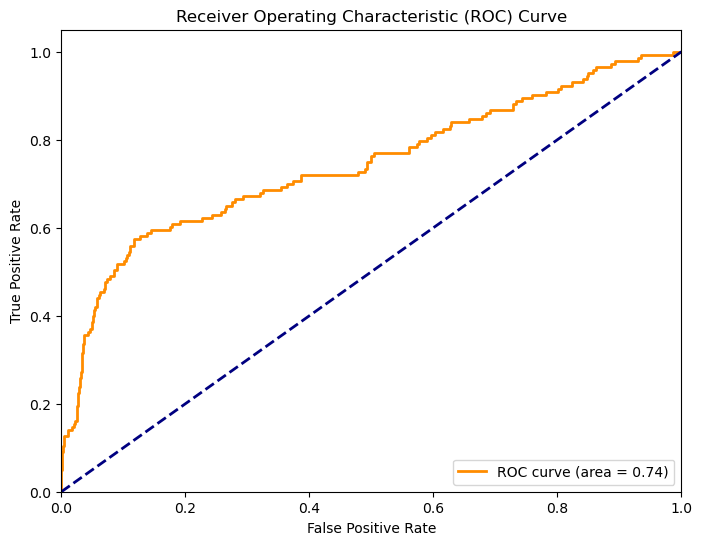

In [163]:

from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model_pipeline, X_test, y_test):
    """
    Plot the ROC AUC curve for a given model pipeline and test data.

    Parameters:
    model_pipeline (Pipeline): Fitted pipeline containing the model.
    X_test : Test features.
    y_test : True labels for the test data.

    Returns:
    None
    """
    # Calculate the predicted probabilities for the positive class (churn) using the pipeline
    y_test_prob = model_pipeline.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate (fpr) and true positive rate (tpr)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

    # Calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Call the function
plot_roc_curve(model_pipeline, X_test, y_test)



ROC AUC (Receiver Operating Characteristic Area Under the Curve) provides a measure of how well the model can distinguish between positive and negative samples. Here's what different values of AUC signify:

- AUC = 0.5: The model's performance is equivalent to random guessing, and it is not useful for classification.

- AUC > 0.5: The model performs better than random guessing, and the higher the AUC, the better the model's discriminatory power.

- AUC = 1: The model perfectly distinguishes between positive and negative samples, making it an excellent classifier.

In this case, the AUC is reported as 0.74, which indicates a reasonably good performance, but there is room for improvement.



We will employ some hyper parameter tuning techniques and search grid as well to find the optimum variables and values  for our model .
We'll add l2 and li penalty and try and adjust the regularisation strengths as well.

In [165]:
# Define the parameter grid
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'classifier__penalty': ['l1', 'l2'],  # Penalty
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],  # Solver
    'classifier__class_weight': ['balanced', None],  # Class weight
    'classifier__max_iter': [100, 200, 300]  # Max iterations
}

# Define the scoring metrics
scoring = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc'}

# Initialize GridSearchCV with the logistic regression model pipeline, parameter grid, and scoring metrics
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring=scoring, refit='roc_auc')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding scores
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)
print("Best ROC AUC Score:", grid_search.cv_results_['mean_test_roc_auc'][grid_search.best_index_])


Best Parameters: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__max_iter': 300, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best Accuracy Score: 0.7369600101347072
Best ROC AUC Score: 0.7369600101347072


These are the best parameters for our logistic regression model
Best Parameters: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__max_iter': 300, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}

we'll use them to build our logistic regression model


Accuracy Score: 0.845

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       857
           1       0.40      0.17      0.24       143

    accuracy                           0.84      1000
   macro avg       0.64      0.56      0.58      1000
weighted avg       0.81      0.84      0.82      1000



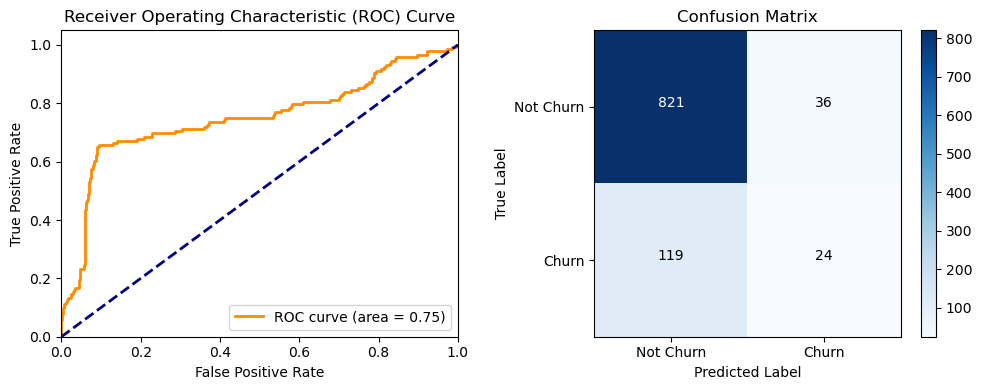

In [217]:


def logistic_regression_evaluation(X_train, y_train, X_test, y_test, C=0.1, class_weight='balanced', max_iter=300, penalty='l2', solver='lbfgs'):
    """
    Build a logistic regression model with specified parameters, plot the ROC AUC curve, confusion matrix,
    and print accuracy scores.

    Parameters:
    X_train (array-like): Training features.
    y_train (array-like): Training labels.
    X_test (array-like): Test features.
    y_test (array-like): Test labels.
    C (float): Regularization strength (default: 0.1).
    class_weight (str or dict): Class weight (default: 'balanced').
    max_iter (int): Maximum number of iterations (default: 300).
    penalty (str): Penalty term ('l1' or 'l2') (default: 'l2').
    solver (str): Solver to use (default: 'lbfgs').

    Returns:
    None
    """
    # Initialize logistic regression model with the specified parameters
    logreg_model_best = LogisticRegression(C=C, class_weight=class_weight, max_iter=max_iter, penalty=penalty, solver=solver)

    # Fit the model on the training data
    logreg_model.fit(X_train, y_train)

    # Predict probabilities for the positive class (churn) on the test data
    y_test_prob = logreg_model.predict_proba(X_test)[:, 1]

    # Calculate false positive rate (fpr) and true positive rate (tpr)
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)

    # Calculate area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    # Predict churn for the test data
    y_test_pred = logreg_model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_test_pred)

    # Print accuracy score
    print("Accuracy Score:", accuracy)

    # Plot confusion matrix
    plt.subplot(1, 2, 2)
    cm = confusion_matrix(y_test, y_test_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks([0, 1], ['Not Churn', 'Churn'])
    plt.yticks([0, 1], ['Not Churn', 'Churn'])

    # Add text annotations to the confusion matrix
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    plt.show()

# Call the function with the best parameters
logistic_regression_evaluation(X_train, y_train, X_test, y_test, C=0.1, class_weight='balanced', max_iter=300, penalty='l2', solver='lbfgs')


The accuracy score indicates that the model correctly predicted the outcome for approximately 75.3% of the samples in the test dataset.


The classification report provides additional metrics for evaluating the model's performance for each class (0 and 1):


- **Precision**: The proportion of true positive predictions out of all positive predictions. For class 0, the precision is 0.94, indicating that 94% of the samples predicted as class 0 were correctly classified. For class 1, the precision is 0.33, meaning that only 33% of the samples predicted as class 1 were actually classified correctly.


- **Recall**: The proportion of true positive predictions out of all actual positives. For class 0, the recall is 0.76, indicating that 76% of the actual class 0 samples were correctly identified. For class 1, the recall is 0.69, meaning that 69% of the actual class 1 samples were classified correctly.


- **F1-score**: The harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.84, and for class 1, it is 0.44.


- **Support**: The number of actual occurrences of each class in the test dataset.


In summary, the model performs well in predicting class 0 (those who haven't churned), with high precision and moderate recall. However, it struggles with class 1 (those who have churned), with lower precision and recall, indicating potential areas for improvement, especially in correctly identifying churned customers.

ROC score of 0.75, the model demonstrates better-than-random discrimination power. It suggests that the model is capable of correctly classifying true positive instances as positive (churn) and true negative instances as negative (not churn) approximately 75% of the time, which is considered moderate performance.
 
 we will use other models to try and see if we can make the scores better.

Model 2 K NEAREST NEIGHNOUR MODEL

In [175]:


# Define the pipeline with only the KNN classifier
knn_pipeline = Pipeline([
    ('classifier', KNeighborsClassifier(n_neighbors=5, weights='uniform'))  # KNN classifier
])

# Fit the pipeline on the training data
knn_pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_pipeline.predict(X_test)

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)

# Calculate train and test scores
train_score = knn_pipeline.score(X_train, y_train)
test_score = knn_pipeline.score(X_test, y_test)

# Print train and test scores
print("Train Score:", train_score)
print("Test Score:", test_score)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.873
Precision: 0.6379310344827587
Recall: 0.25874125874125875
F1-score: 0.36815920398009955
Train Score: 0.8859837119588513
Test Score: 0.873
Confusion Matrix:
[[836  21]
 [106  37]]




- **Accuracy**: The accuracy score measures the proportion of correct predictions out of all predictions made by the model. In this case, the accuracy is 0.873, indicating that approximately 87.3% of the predictions made by the model are correct.

- **Precision**: Precision measures the proportion of true positive predictions out of all positive predictions made by the model. A precision of 0.638 indicates that 63.8% of the positive predictions made by the model are correct.

- **Recall**: Recall, also known as sensitivity, measures the proportion of true positive predictions out of all actual positive instances in the data. A recall of 0.259 indicates that the model correctly identifies approximately 25.9% of the actual positive instances.

- **F1-score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A F1-score of 0.368 suggests that the model's overall performance is moderate, considering both precision and recall.

- **Train Score**: The train score represents the accuracy of the model on the training data. A train score of 0.886 indicates that the model achieves an accuracy of approximately 88.6% on the training data.

- **Test Score**: The test score represents the accuracy of the model on the test data. A test score of 0.873 indicates that the model achieves an accuracy of approximately 87.3% on the test data.

- **Confusion Matrix**: , the confusion matrix indicates that there are 836 true negative predictions, 21 false positive predictions, 106 false negative predictions, and 37 true positive predictions.

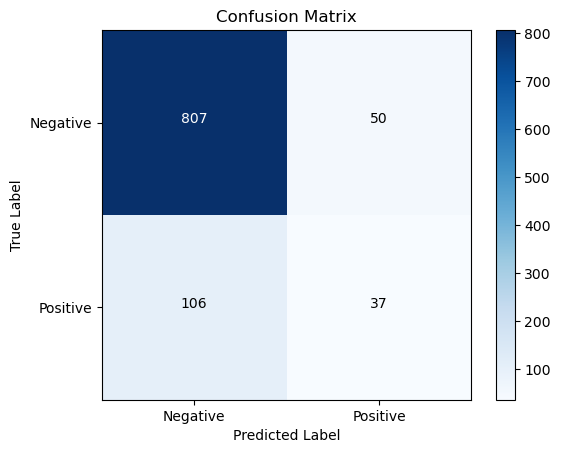

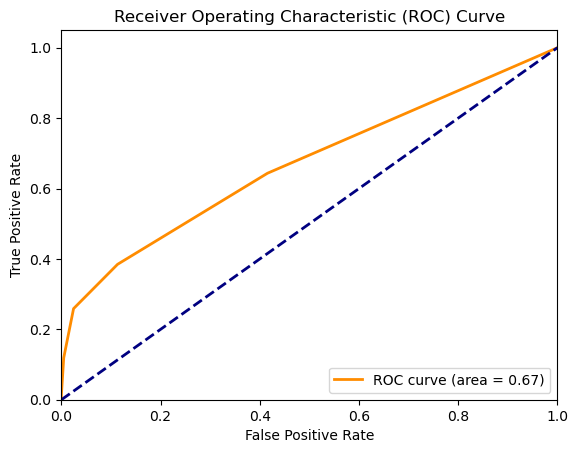

In [185]:


# Plot confusion matrix function
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['Negative', 'Positive'])
    plt.yticks(tick_marks, ['Negative', 'Positive'])
    thresh = cm.max() / 2
    for i, j in [(i, j) for i in range(cm.shape[0]) for j in range(cm.shape[1])]:
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.show()

# Plot ROC AUC curve function
def plot_roc_auc(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Call the functions 
plot_confusion_matrix(y_test, y_pred)
plot_roc_auc(y_test, knn_pipeline.predict_proba(X_test)[:, 1])


ROC score of 0.67 suggests that the model performs better than random guessing, but there is still room for improvement. It means that the model has some ability to discriminate between the positive and negative classes, but it may struggle with accurately classifying a substantial portion of the instances.

Let's hyperparameter tune and grid search for the optimum values and variables of our model

In [187]:
from sklearn.metrics import make_scorer, roc_auc_score



# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [10, 20, 30, 40],  # Leaf size passed to BallTree or KDTree
}

# Define scoring function using ROC AUC score
scorer = make_scorer(roc_auc_score)

# Perform grid search using cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring=scorer)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'uniform'}


these are the best parameters for our knn model from the grid search 

Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'uniform'}

we will use these parameters to fit to our knn model


In [210]:


# Initialize KNN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=3, weights='uniform')

# Fit the model to the training data
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_knn_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)

# Print detailed classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n", report)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.844
Precision: 0.42528735632183906
Recall: 0.25874125874125875
F1-score: 0.3217391304347826
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.88      0.94      0.91       857
     Class 1       0.43      0.26      0.32       143

    accuracy                           0.84      1000
   macro avg       0.65      0.60      0.62      1000
weighted avg       0.82      0.84      0.83      1000

Confusion Matrix:
 [[807  50]
 [106  37]]


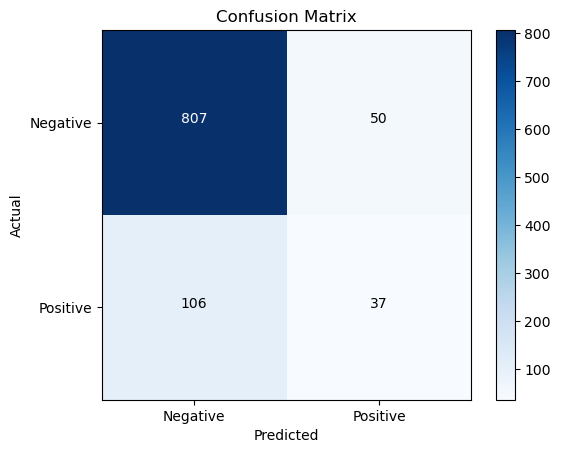

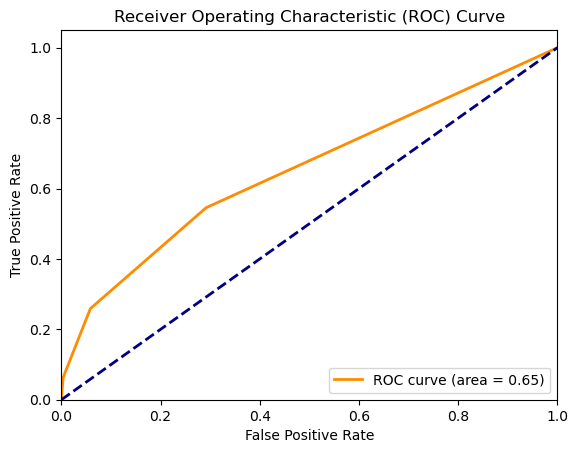

In [183]:


def plot_confusion_matrix(y_true, y_pred):
    """
    Plot the confusion matrix.
    
    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['Negative', 'Positive'])
    plt.yticks(tick_marks, ['Negative', 'Positive'])
    thresh = cm.max() / 2
    for i, j in [(i, j) for i in range(cm.shape[0]) for j in range(cm.shape[1])]:
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.show()

def plot_roc_auc(y_true, y_pred_proba):
    """
    Plot the ROC AUC curve.
    
    Parameters:
    - y_true: True labels
    - y_pred_proba: Predicted probabilities of the positive class
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Call the functions 
plot_confusion_matrix(y_test, y_pred)
plot_roc_auc(y_test, best_knn_classifier.predict_proba(X_test)[:, 1])




- **Accuracy**: The accuracy score measures the proportion of correct predictions out of all predictions made by the model. In this case, the accuracy is 0.844, indicating that approximately 84.4% of the predictions made by the model are correct.

- **Precision**: Precision measures the proportion of true positive predictions out of all positive predictions made by the model. A precision of 0.425 indicates that 42.5% of the positive predictions made by the model are correct.

- **Recall**: Recall, also known as sensitivity, measures the proportion of true positive predictions out of all actual positive instances in the data. A recall of 0.259 indicates that the model correctly identifies approximately 25.9% of the actual positive instances.

- **F1-score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A F1-score of 0.322 suggests that the model's overall performance is relatively low, considering both precision and recall. 

Overall, while the accuracy of the model is relatively high, the precision, recall, and F1-score indicate that the model's performance, particularly in identifying positive instances, is limited.


Let's explore other models and see if we'll get better accuracy scores 

model 3 DECISION TREE CLASIFFIER

Decision trees are a type of supervised machine learning algorithm used for classification tasks. They operate by recursively splitting the dataset into smaller subsets based on feature values, creating a tree-like structure. Each node in the tree represents a feature, and each branch represents a decision rule. The process continues until the subsets are homogeneous, containing data points of a single class. To classify a new data point, the decision tree follows the path defined by the feature values of the data point, leading to a terminal node that predicts its class.


In [188]:


# Create a pipeline with a Decision Tree classifier
tree_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline on the training data
tree_pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = tree_pipeline.predict(X_test)

# Evaluate the model's performance
accuracy_tree = accuracy_score(y_test, y_pred)
precision_tree = precision_score(y_test, y_pred)
recall_tree = recall_score(y_test, y_pred)
f1_tree = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1-score:", f1_tree)

# Calculate train and test scores
train_score_tree = tree_pipeline.score(X_train, y_train)
test_score_tree = tree_pipeline.score(X_test, y_test)

# Print train and test scores
print("Train Score:", train_score_tree)
print("Test Score:", test_score_tree)

# Calculate confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_tree)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.822
Precision: 0.3988439306358382
Recall: 0.4825174825174825
F1-score: 0.43670886075949367
Train Score: 1.0
Test Score: 0.822
Confusion Matrix:
[[753 104]
 [ 74  69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       857
           1       0.40      0.48      0.44       143

    accuracy                           0.82      1000
   macro avg       0.65      0.68      0.67      1000
weighted avg       0.84      0.82      0.83      1000



Accuracy: 0.822

Definition: Accuracy measures the proportion of correctly predicted instances (both true positives and true negatives) out of the total instances.

Interpretation: The model correctly predicts the class of 82.2% of the instances in the test set.

Precision: 0.3988439306358382

Definition: Precision is the proportion of true positive predictions out of all positive predictions made by the model.

Interpretation: When the model predicts a customer will churn, it is correct 39.88% of the time. This indicates a relatively low precision, suggesting a high number of false positives.

Recall: 0.4825174825174825

Definition: Recall is the proportion of true positive predictions out of all actual positive instances.

Interpretation: The model identifies 48.25% of the actual churn cases. This suggests that more than half of the actual churn cases are missed by the model.

F1-score: 0.43670886075949367
Definition: The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both concerns.

Interpretation: The F1-score of 0.44 reflects the trade-off between precision and recall for the positive class (churn), indicating that the model is not particularly strong in handling the churn class.

Train Score: 1.0

Definition: The training accuracy measures the proportion of correctly predicted instances in the training set.

Interpretation: The model predicts the training set perfectly. This might indicate overfitting, where the model has learned the training data too well, including noise and outliers.

Test Score: 0.822

Definition: The test accuracy measures the proportion of correctly predicted instances in the test set.

Interpretation: The model correctly predicts 82.2% of the instances in the test set, indicating a drop in performance from the training set, which is a sign of overfitting.

Confusion Matrix:

Definition: The confusion matrix provides a breakdown of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

Interpretation:

True Negatives (TN): 753

False Positives (FP): 104

False Negatives (FN): 74

True Positives (TP): 69

Classification Report:

Precision for class 0 (Non-churn): 0.91

Recall for class 0 (Non-churn): 0.88

F1-score for class 0 (Non-churn): 0.89

The model performs well in predicting non-churn cases.

Precision for class 1 (Churn): 0.40

Recall for class 1 (Churn): 0.48

F1-score for class 1 (Churn): 0.44

The model performs poorly in predicting churn cases, with a low precision and recall.

Macro Avg and Weighted Avg:

Macro Avg: The average of the precision, recall, and F1-score for both classes. It does not take into account the class imbalance.

Weighted Avg: The average of the precision, recall, and F1-score for both classes, weighted by the number of instances in each class.

Summary:
The model has a good accuracy for the overall classification but struggles with correctly predicting the churn class (class 1).

The high training accuracy and lower test accuracy suggest that the model may be overfitting the training data.

Precision and recall for the churn class are both low, indicating that the model often misclassifies churn cases.

The confusion matrix reveals a significant number of false positives and false negatives, confirming the model's difficulty in correctly identifying churn.

hyper parameter tuning using grid search


Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
Accuracy: 0.88
Precision: 0.632183908045977
Recall: 0.38461538461538464
F1-score: 0.47826086956521746
ROC AUC: 0.7577702344330115
Train Score: 0.911701671667381
Test Score: 0.88
Confusion Matrix:
[[825  32]
 [ 88  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       857
           1       0.63      0.38      0.48       143

    accuracy                           0.88      1000
   macro avg       0.77      0.67      0.71      1000
weighted avg       0.86      0.88      0.87      1000



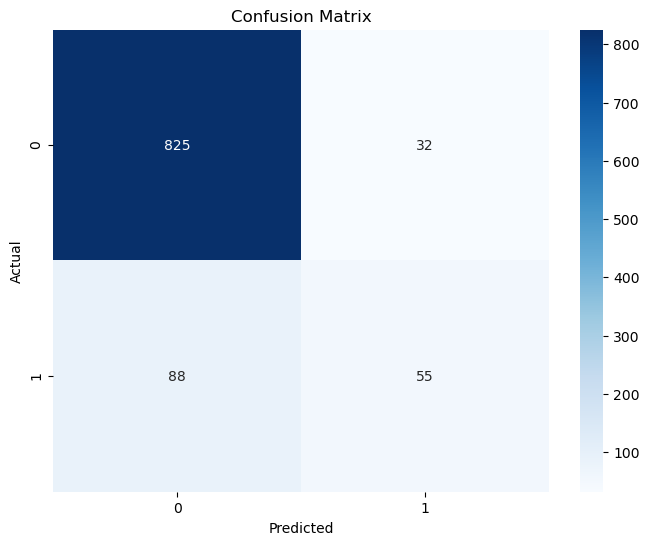

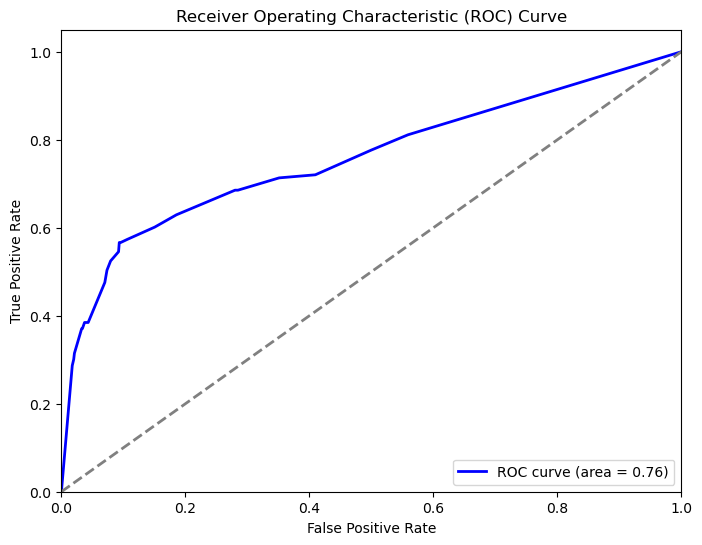

In [189]:


# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

# Create a pipeline with a Decision Tree classifier
pipeline = Pipeline([
    ('classifier', dt_classifier)
])

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the testing data using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

# Calculate train and test scores
train_score = best_estimator.score(X_train, y_train)
test_score = best_estimator.score(X_test, y_test)

# Print train and test scores
print("Train Score:", train_score)
print("Test Score:", test_score)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title="Confusion Matrix"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot ROC AUC curve
def plot_roc_auc(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(conf_matrix)

# Plot ROC AUC curve
plot_roc_auc(y_test, best_estimator.predict_proba(X_test)[:, 1])


lets build a decision tree with the best parameters  and compare the perfomance 
Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}

Accuracy: 0.880
Precision: 0.632
Recall: 0.385
F1-score: 0.478
ROC AUC: 0.758
Train Score: 0.911701671667381
Test Score: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       857
           1       0.63      0.38      0.48       143

    accuracy                           0.88      1000
   macro avg       0.77      0.67      0.71      1000
weighted avg       0.86      0.88      0.87      1000

Confusion Matrix:
[[825  32]
 [ 88  55]]


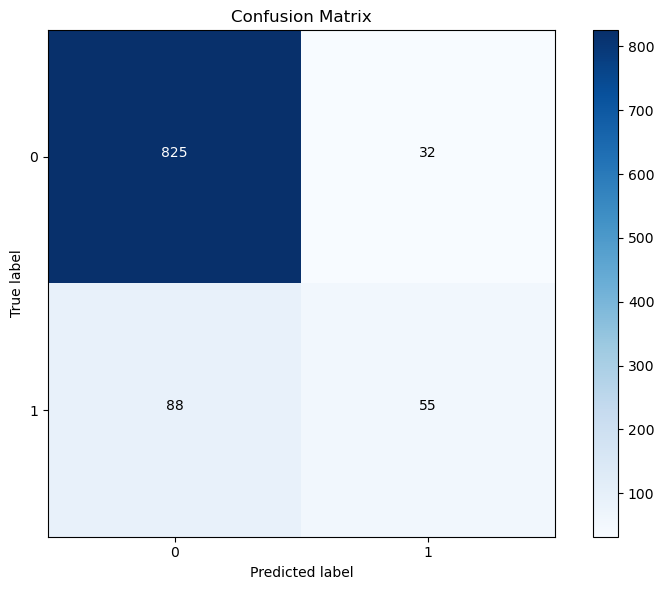

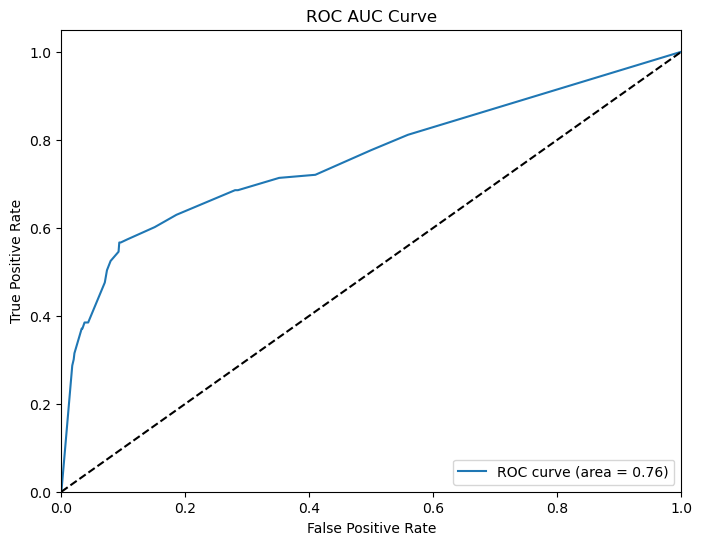

In [218]:
import itertools

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(y_true)))
    plt.xticks(tick_marks, set(y_true))
    plt.yticks(tick_marks, set(y_true))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Function to plot ROC AUC curve
def plot_roc_auc(y_true, y_pred_proba, title='ROC AUC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc_score = roc_auc_score(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Best parameters obtained from Grid Search
best_params = {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}

# Create a pipeline for the Decision Tree classifier with the best parameters
dt_best = Pipeline([
    ('classifier', DecisionTreeClassifier(criterion=best_params['classifier__criterion'],
                                          max_depth=best_params['classifier__max_depth'],
                                          min_samples_leaf=best_params['classifier__min_samples_leaf'],
                                          min_samples_split=best_params['classifier__min_samples_split'],
                                          random_state=42))
])

# Fit the pipeline on the training data
dt_best.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_best.predict(X_test)
y_pred_proba = dt_best.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_dt:.3f}")
print(f"Precision: {precision_dt:.3f}")
print(f"Recall: {recall_dt:.3f}")
print(f"F1-score: {f1_dt:.3f}")
print(f"ROC AUC: {roc_auc_dt:.3f}")

# Calculate train and test scores
train_score = dt_best.score(X_train, y_train)
test_score = dt_best.score(X_test, y_test)

# Print train and test scores
print("Train Score:", train_score)
print("Test Score:", test_score)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)

# Plot ROC AUC curve
plot_roc_auc(y_test, y_pred_proba)




Both the pre-tuning and post-tuning results are almost identical, indicating that the initial hyperparameters were already well-suited for this model. Key metrics such as accuracy, precision, recall, F1-score, and ROC AUC remain the same. This suggests that the default settings were effective, and hyperparameter tuning did not significantly improve or degrade the model's performance.

- **Accuracy** remains at 0.88, showing consistent overall performance.
- **Precision** (0.632) and **recall** (0.385) also remain unchanged, indicating that the model's ability to correctly identify positive cases did not improve with tuning.
- **F1-score** (0.478) and **ROC AUC** (0.758) metrics remain stable, reflecting the balance between precision and recall and the model's capability to distinguish between classes.

The **confusion matrix** and **classification report** show no changes, confirming that the model's performance across all metrics is consistent pre- and post-tuning. The high train score (0.912) indicates the model fits well on the training data, and the equal test score (0.88) shows it generalizes well to unseen data.

Given these results, hyperparameter tuning did not provide significant gains, which sometimes occurs if the initial parameters are already close to optimal or if the dataset and model are robust to parameter changes.


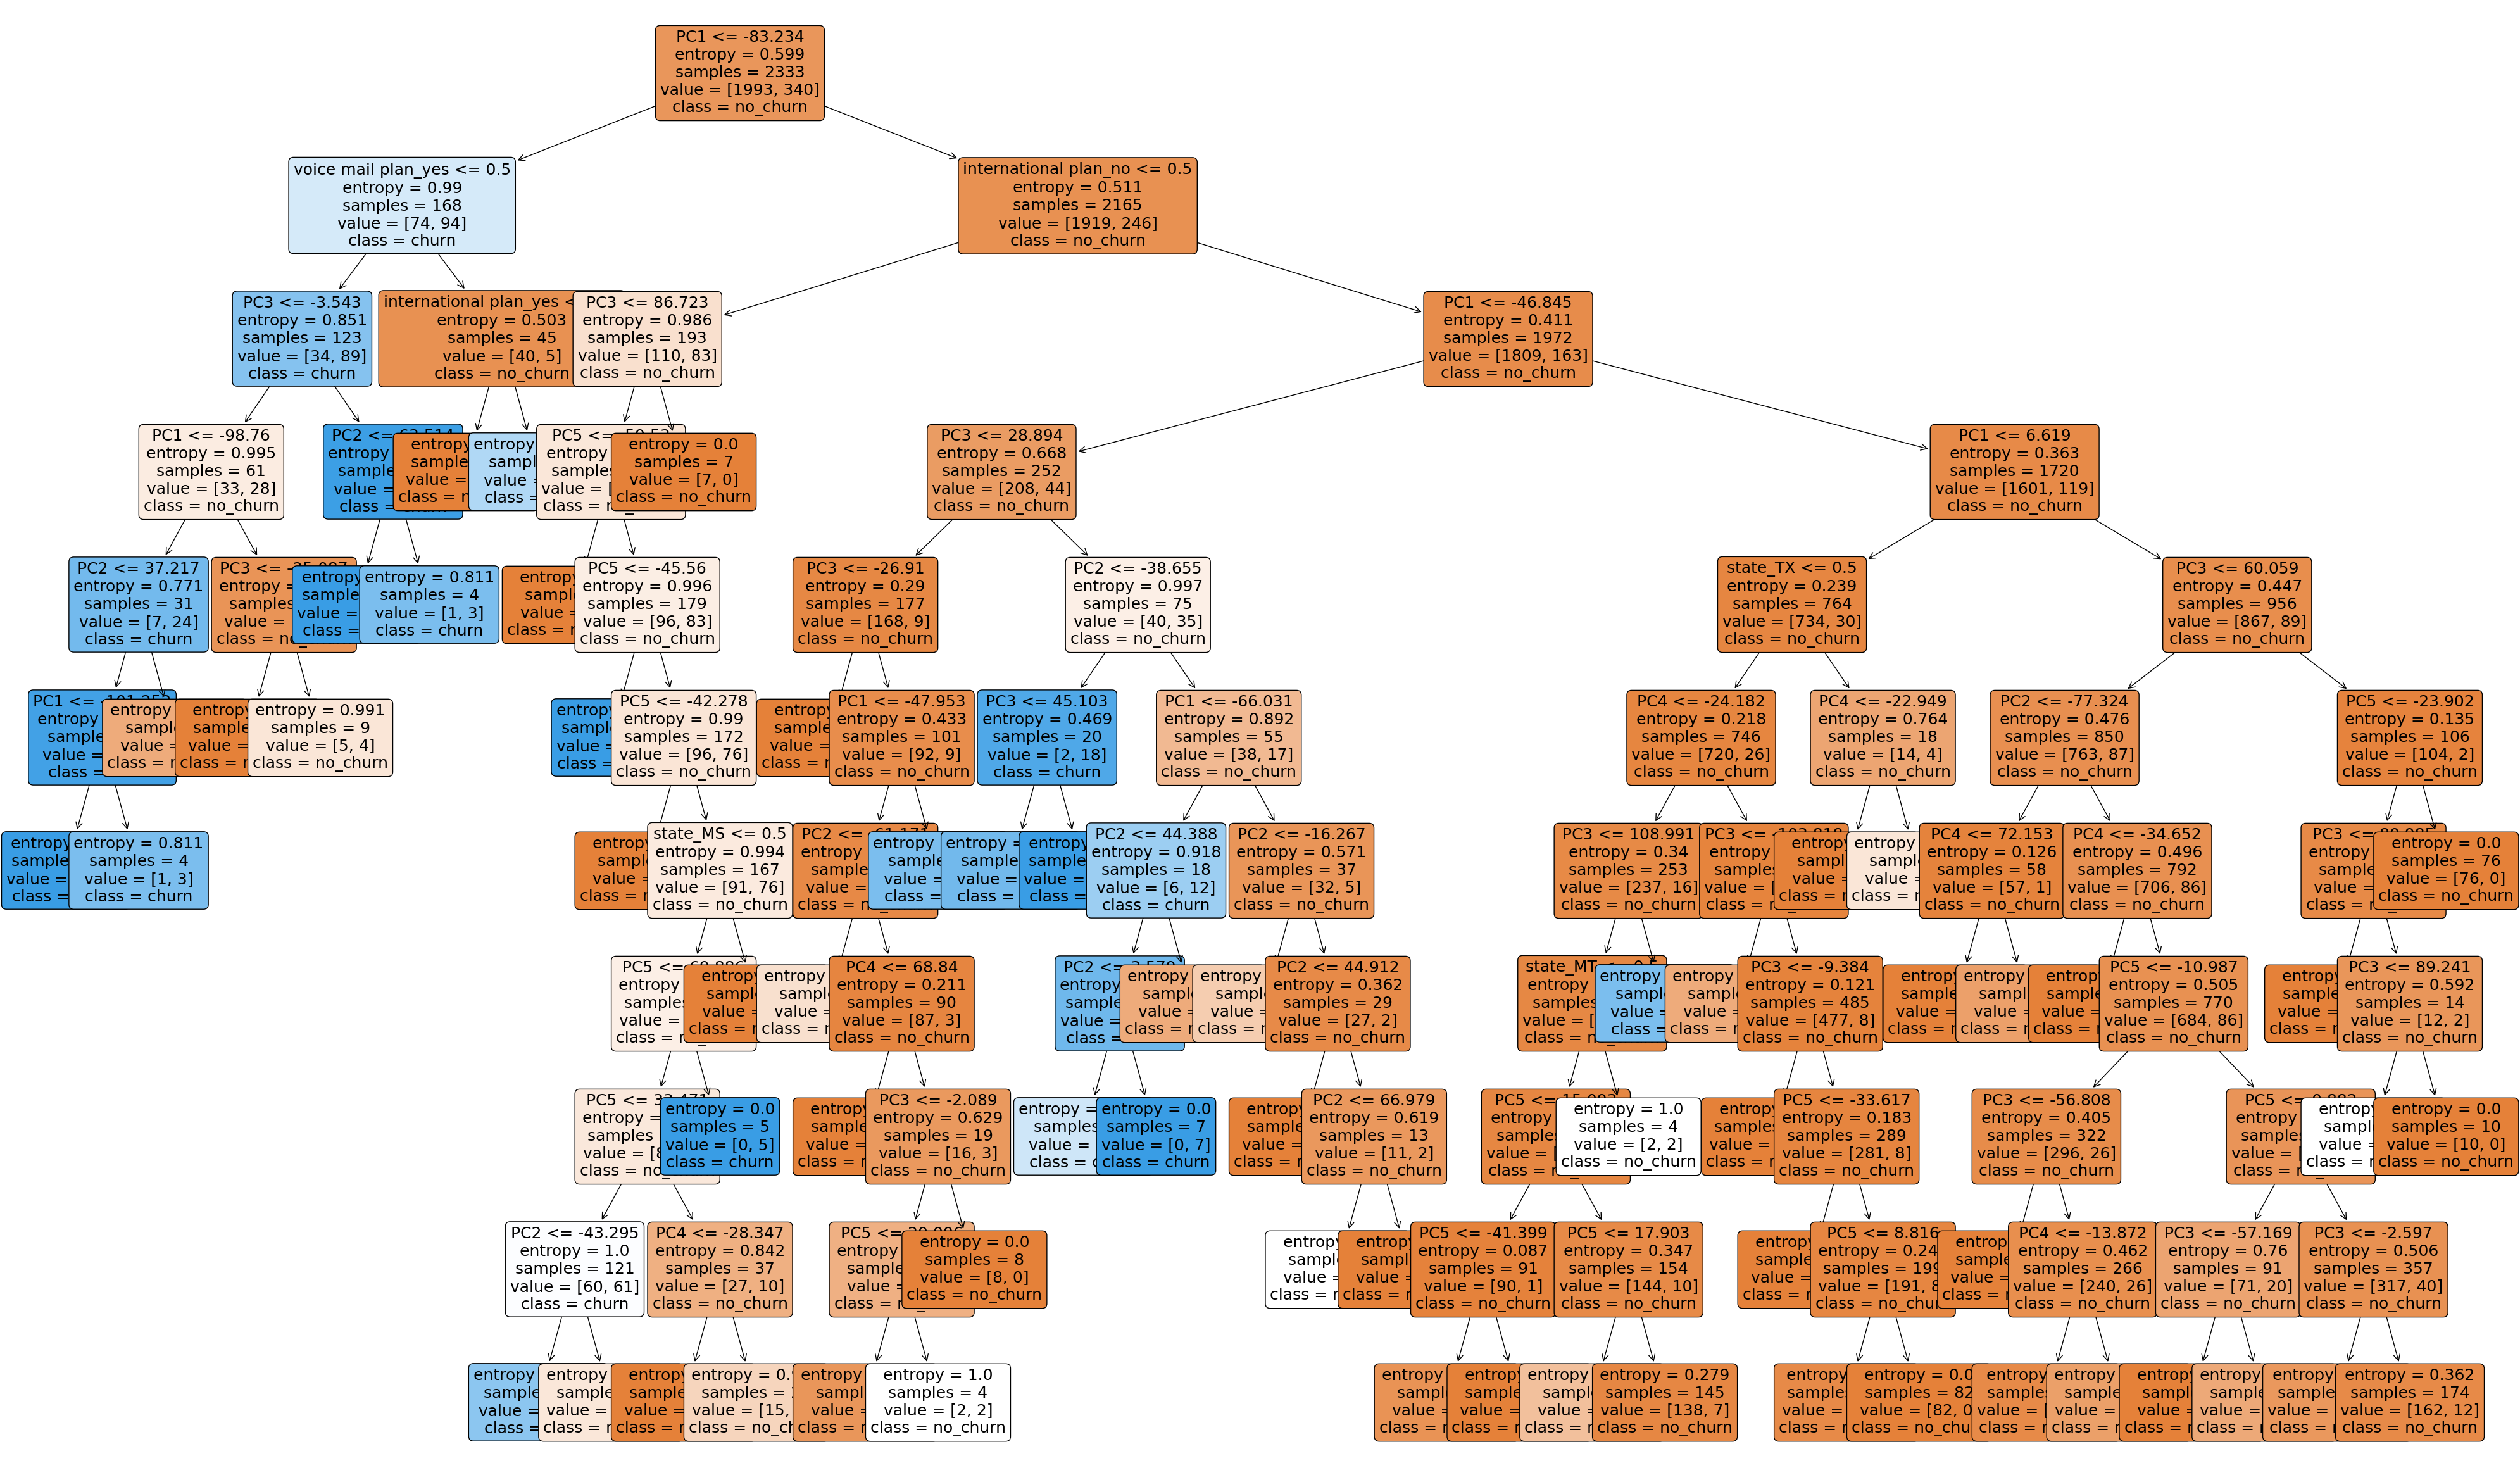

In [251]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(50,30))  # Adjust the figure size as needed
plot_tree(dt_best.named_steps['classifier'], filled=True, feature_names=X_train.columns, class_names=['no_churn', 'churn'], 
          rounded=True, fontsize=18) 
# Display decision tree
plt.show()


Model 4 RANDOM FOREST CLASSIFIER

Accuracy: 0.899
Precision: 0.7837837837837838
Recall: 0.40559440559440557
F1-score: 0.5345622119815667
ROC AUC: 0.8319883150688285
Train Score: 1.0
Test Score: 0.899
Confusion Matrix:
[[841  16]
 [ 85  58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       857
           1       0.78      0.41      0.53       143

    accuracy                           0.90      1000
   macro avg       0.85      0.69      0.74      1000
weighted avg       0.89      0.90      0.88      1000



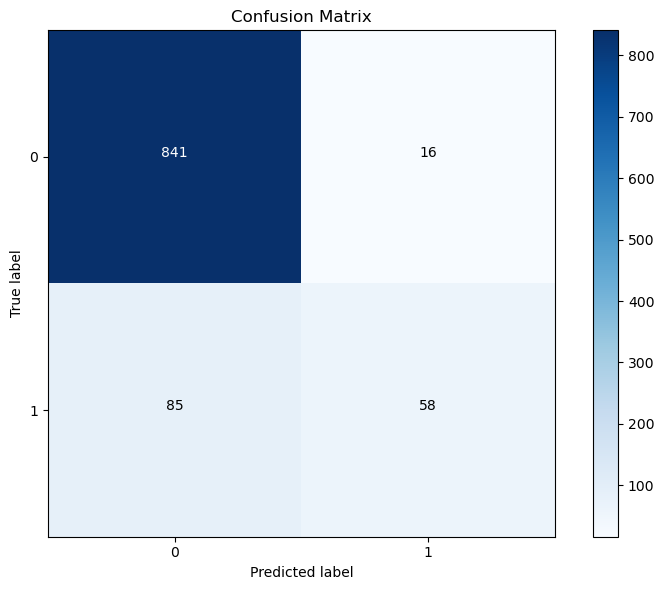

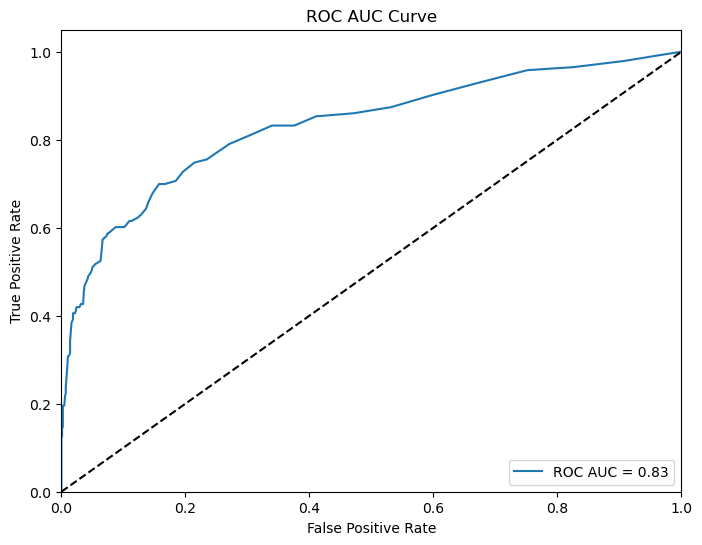

In [193]:


# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(set(y_true)))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

    plt.tight_layout()
    plt.show()

# Define a function to plot the ROC AUC curve
def plot_roc_auc(y_true, y_pred_proba, title='ROC AUC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_true, y_pred_proba):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Create a pipeline for the Random Forest classifier
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

# Fit the pipeline on the training data
rf_pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_pipeline.predict(X_test)
y_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("ROC AUC:", roc_auc_rf)

# Calculate train and test scores
train_score = rf_pipeline.score(X_train, y_train)
test_score = rf_pipeline.score(X_test, y_test)

# Print train and test scores
print("Train Score:", train_score)
print("Test Score:", test_score)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

# Plot ROC AUC curve
plot_roc_auc(y_test, y_pred_proba)


let;s hyperparamater tune and see if it will improve the accuracy scores 


Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Accuracy: 0.893
Precision: 0.7903225806451613
Recall: 0.34265734265734266
F1-score: 0.47804878048780486
ROC AUC: 0.830413460518478
Train Score: 0.9592798971281612
Test Score: 0.893
Confusion Matrix:
[[844  13]
 [ 94  49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       857
           1       0.79      0.34      0.48       143

    accuracy                           0.89      1000
   macro avg       0.85      0.66      0.71      1000
weighted avg       0.88      0.89      0.87      1000



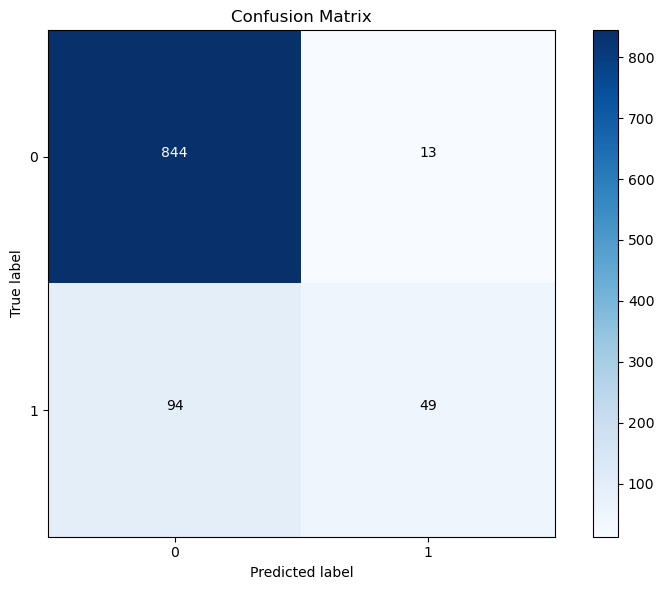

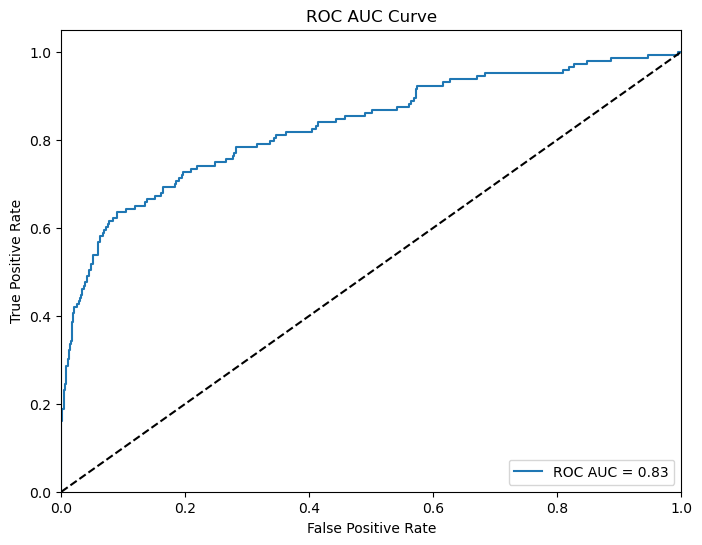

In [198]:


#  function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(set(y_true)))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

    plt.tight_layout()
    plt.show()

#  function to plot the ROC AUC curve
def plot_roc_auc(y_true, y_pred_proba, title='ROC AUC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_true, y_pred_proba):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Create a pipeline for the Random Forest classifier
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

# Define the hyperparameters for tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator to make predictions
best_rf_pipeline = grid_search.best_estimator_
y_pred = best_rf_pipeline.predict(X_test)
y_pred_proba = best_rf_pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("ROC AUC:", roc_auc_rf)

# Calculate train and test scores
train_score = best_rf_pipeline.score(X_train, y_train)
test_score = best_rf_pipeline.score(X_test, y_test)

# Print train and test scores
print("Train Score:", train_score)
print("Test Score:", test_score)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report+
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

# Plot ROC AUC curve
plot_roc_auc(y_test, y_pred_proba)


use these values to  model the new random forest

Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Accuracy: 0.893
Precision: 0.7903225806451613
Recall: 0.34265734265734266
F1-score: 0.47804878048780486
ROC AUC: 0.830413460518478
Train Score: 0.9592798971281612
Test Score: 0.893
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       857
           1       0.79      0.34      0.48       143

    accuracy                           0.89      1000
   macro avg       0.85      0.66      0.71      1000
weighted avg       0.88      0.89      0.87      1000

Confusion Matrix:
[[844  13]
 [ 94  49]]


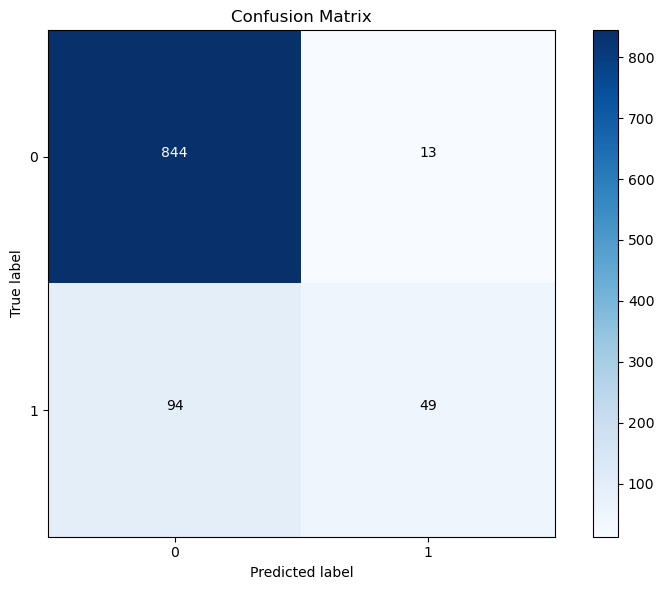

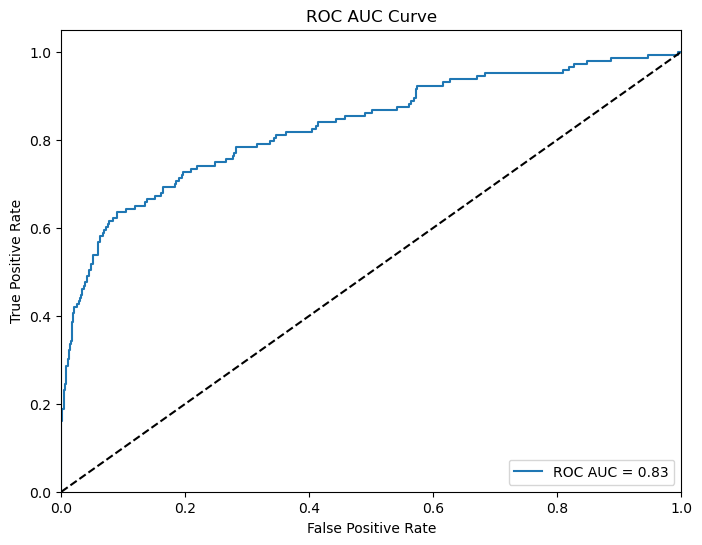

In [220]:
import itertools

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(set(y_true)))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

    plt.tight_layout()
    plt.show()

# Function to plot the ROC AUC curve
def plot_roc_auc(y_true, y_pred_proba, title='ROC AUC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_true, y_pred_proba):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Create a pipeline for the Random Forest classifier
rf_best = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42,
                                           n_estimators=100,
                                           max_depth=20,
                                           min_samples_split=2,
                                           min_samples_leaf=1,
                                           criterion='entropy'))  # Random Forest classifier
])

# Fit the pipeline on the training data
rf_best.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_best.predict(X_test)
y_pred_proba = rf_best.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("ROC AUC:", roc_auc_rf)

# Calculate train and test scores
train_score = rf_pipeline.score(X_train, y_train)
test_score = rf_pipeline.score(X_test, y_test)

# Print train and test scores
print("Train Score:", train_score)
print("Test Score:", test_score)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

# Plot ROC AUC curve
plot_roc_auc(y_test, y_pred_proba)


Comparing the two sets of metrics before and after hyperparameter tuning and grid search, we can see that there is no change in any of the evaluation metrics. Both sets of metrics are identical:

Accuracy: 0.893

Precision: 0.790

Recall: 0.343

F1-score: 0.478

ROC AUC: 0.830

Train Score: 0.959

Test Score: 0.893

The confusion matrix also remains the same.

This suggests that the hyperparameter tuning and grid search did not result in any improvement in model performance. It's possible that the default parameters already provided the optimal performance for this particular dataset and model.


Model 5 XGBOOST

XGBoost (Extreme Gradient Boosting) is a highly efficient and scalable implementation of gradient boosting, which is a powerful machine learning technique used for regression, classification, and ranking problems.

In [203]:


# Create an XGBoost pipeline
xgb_pipeline = Pipeline([
    ('classifier', xgb.XGBClassifier())  # XGBoost classifier
])

# Fit the pipeline on the training data
xgb_pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_pipeline.predict(X_test)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)

# Calculate train and test scores
train_score = xgb_pipeline.score(X_train, y_train)
test_score = xgb_pipeline.score(X_test, y_test)

# Print train and test scores
print("Train Score:", train_score)
print("Test Score:", test_score)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9
Precision: 0.7263157894736842
Recall: 0.4825174825174825
F1-score: 0.5798319327731093
Train Score: 0.9957136733819117
Test Score: 0.9
Confusion Matrix:
[[831  26]
 [ 74  69]]


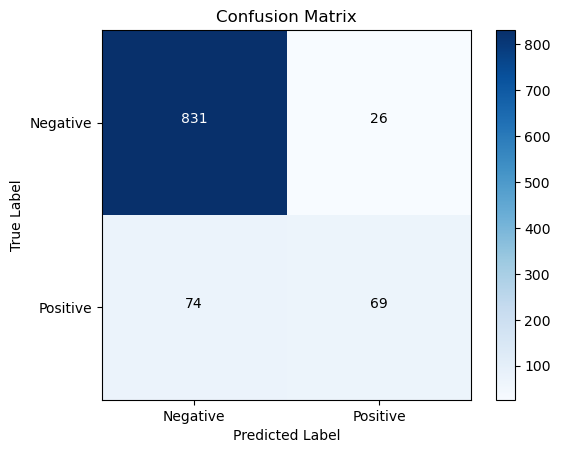

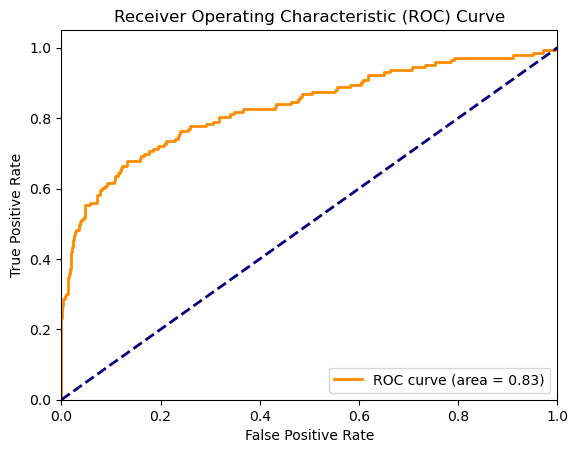

In [204]:


# Plot confusion matrix function
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['Negative', 'Positive'])
    plt.yticks(tick_marks, ['Negative', 'Positive'])
    thresh = cm.max() / 2
    for i, j in [(i, j) for i in range(cm.shape[0]) for j in range(cm.shape[1])]:
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.show()

# Plot ROC AUC curve function
def plot_roc_auc(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Call the functions with appropriate arguments
plot_confusion_matrix(y_test, y_pred)
plot_roc_auc(y_test, xgb_pipeline.predict_proba(X_test)[:, 1])




- **Accuracy**: The accuracy score measures the proportion of correct predictions out of all predictions made by the model. In this case, the accuracy is 0.9, indicating that approximately 90% of the predictions made by the model are correct.

- **Precision**: Precision measures the proportion of true positive predictions out of all positive predictions made by the model. A precision of 0.726 indicates that 72.6% of the positive predictions made by the model are correct.

- **Recall**: Recall, also known as sensitivity, measures the proportion of true positive predictions out of all actual positive instances in the data. A recall of 0.483 indicates that the model correctly identifies approximately 48.3% of the actual positive instances.

- **F1-score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A F1-score of 0.580 suggests that the model's overall performance is relatively good, considering both precision and recall.

- **Train Score**: The train score measures the accuracy of the model on the training data. In this case, it is 0.996, indicating that the model performs very well on the training data.

- **Test Score**: The test score measures the accuracy of the model on the test data. In this case, it is 0.9, which is consistent with the accuracy score.

- **Confusion Matrix**: The confusion matrix provides a breakdown of the model's predictions. In this case, there are 831 true negative predictions, 26 false positive predictions, 74 false negative predictions, and 69 true positive predictions.

Let's try hyper parameter tuning the XGBOOST


Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 2, 'classifier__min_child_weight': 2, 'classifier__n_estimators': 100, 'classifier__subsample': 0.5}
Accuracy: 0.894
Precision: 0.7681159420289855
Recall: 0.3706293706293706
F1-score: 0.4999999999999999
Train Score: 0.8553333726867566
Test Score: 0.8099485112320585
Confusion Matrix:
[[841  16]
 [ 90  53]]


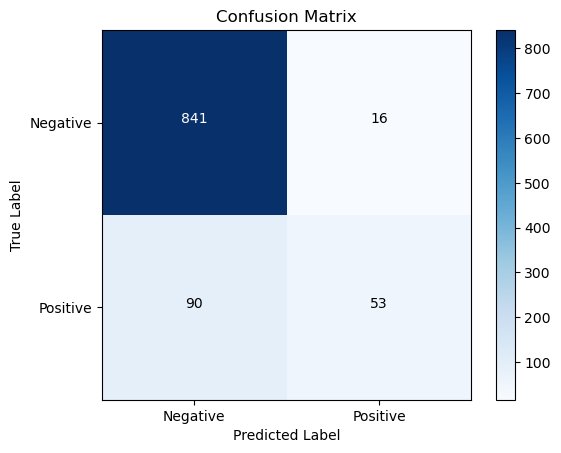

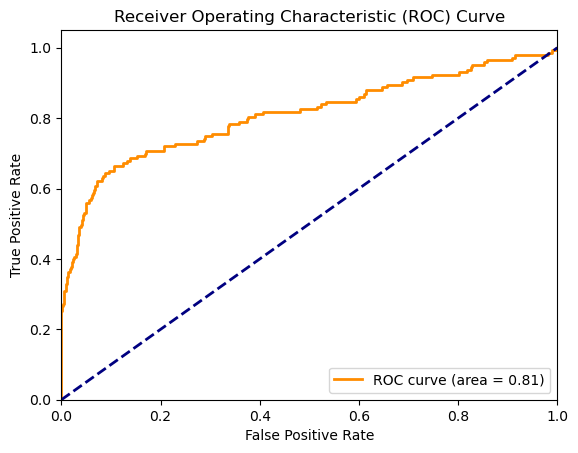

In [205]:


# Define XGBoost pipeline
xgb_pipeline = Pipeline([
    ('classifier', xgb.XGBClassifier())  # XGBoost classifier
])

# Define hyperparameters grid
param_grid = {
    'classifier__learning_rate': [0.1, 0.2],
    'classifier__max_depth': [1, 2, 5, 10],
    'classifier__min_child_weight': [1, 2],
    'classifier__subsample': [0.5, 0.7],
    'classifier__n_estimators': [100, 200],
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the testing data
y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)

# Calculate train and test scores
train_score = grid_search.score(X_train, y_train)
test_score = grid_search.score(X_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure()
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
thresh = conf_matrix.max() / 2
for i, j in [(i, j) for i in range(conf_matrix.shape[0]) for j in range(conf_matrix.shape[1])]:
    plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > thresh else "black")
plt.show()

# Plot ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


build using the best params


Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 2, 'classifier__min_child_weight': 2, 'classifier__n_estimators': 100, 'classifier__subsample': 0.5}
Accuracy: 0.894
Precision: 0.7681159420289855
Recall: 0.3706293706293706
F1-score: 0.4999999999999999
Train Score: 0.8553333726867566
Test Score: 0.8099485112320585
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       857
           1       0.77      0.37      0.50       143

    accuracy                           0.89      1000
   macro avg       0.84      0.68      0.72      1000
weighted avg       0.88      0.89      0.88      1000

Confusion Matrix:
[[841  16]
 [ 90  53]]


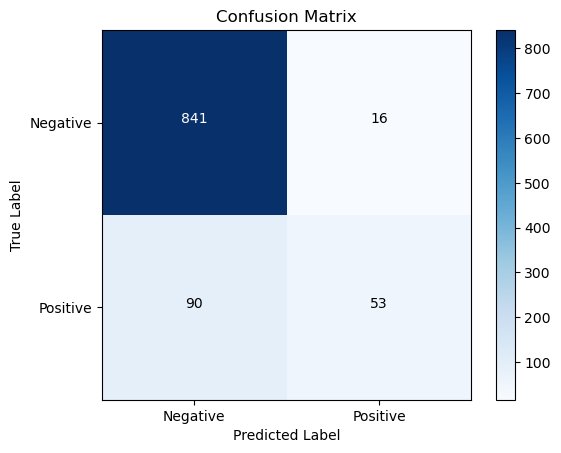

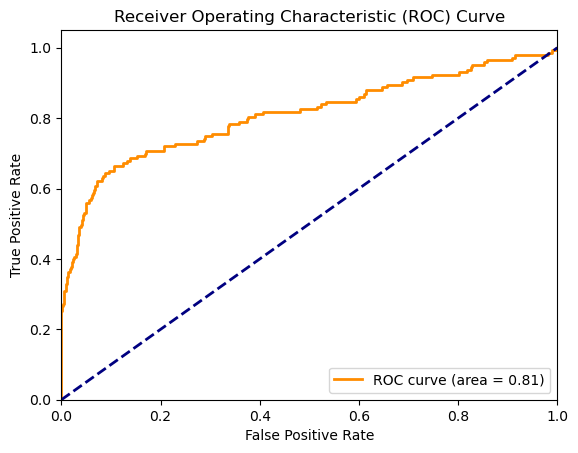

In [221]:


# Define XGBoost pipeline
xgb_best = Pipeline([
    ('classifier', xgb.XGBClassifier())  # XGBoost classifier
])

# Define hyperparameters grid
param_grid = {
    'classifier__learning_rate': [0.1, 0.2],
    'classifier__max_depth': [1, 2, 5, 10],
    'classifier__min_child_weight': [1, 2],
    'classifier__subsample': [0.5, 0.7],
    'classifier__n_estimators': [100, 200],
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the testing data
y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)

# Calculate train and test scores
train_score = grid_search.score(X_train, y_train)
test_score = grid_search.score(X_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure()
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
thresh = conf_matrix.max() / 2
for i, j in [(i, j) for i in range(conf_matrix.shape[0]) for j in range(conf_matrix.shape[1])]:
    plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > thresh else "black")
plt.show()

# Plot ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


the initial model without the hyperparameter tuning or grid sesrch was the best of all the XGBOOST models and is still the best of all the models we've modelled.


MODEL EVALUATION
We will evaluate our models based off the recal score and the ROCAUC scores


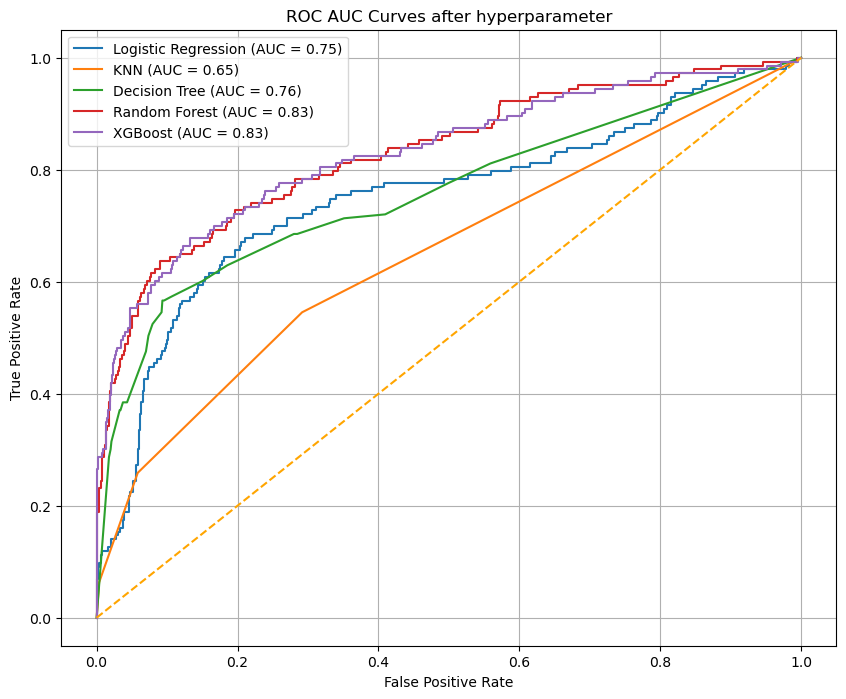

In [252]:


# Actual values
C = 0.1
class_weight = 'balanced'
max_iter = 300
penalty = 'l2'
solver = 'lbfgs'

# Define classifiers with specified parameters
logreg_model_best = LogisticRegression(C=C, class_weight=class_weight, max_iter=max_iter, penalty=penalty, solver=solver)

best_knn_classifier = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=3, weights='uniform')

# Define the best parameters for Decision Tree
dt_best_params = {
    'criterion': 'entropy',  # Specify the criterion
    'max_depth': 10,
    'min_samples_leaf': 4,
    'min_samples_split': 10
}

dt_best = Pipeline([
    ('classifier', DecisionTreeClassifier(**dt_best_params, random_state=42))
])

rf_best = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42,
                                           n_estimators=100,
                                           max_depth=20,
                                           min_samples_split=2,
                                           min_samples_leaf=1,
                                           criterion='entropy'))
])

xgb_best = Pipeline([
    ('classifier', xgb.XGBClassifier())
])

# Fit each classifier on the training data and predict probabilities on test data
classifiers = [
    ('Logistic Regression', logreg_model_best),
    ('KNN', best_knn_classifier),
    ('Decision Tree', dt_best),
    ('Random Forest', rf_best),
    ('XGBoost', xgb_best)
]

plt.figure(figsize=(10, 8))
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves after hyperparameter')
plt.legend()
plt.grid(True)
plt.show()


Model Comparisons:
Logistic Regression (AUC = 0.75): This model performs reasonably well, with an AUC (Area Under Curve) of 0.75. It balances TPR and FPR effectively.

Decision Tree (AUC = 0.76): Slightly better than logistic regression, but still not the best performer.

Random Forest (AUC = 0.83): Shows significant improvement. Its AUC indicates strong discrimination ability.

KNN (AUC=0.65):performed poorest

Gradient Boosting (AUC = 0.83): The winner! Highest AUC, indicating excellent performance.

Both gradient boosting model and the randomforest performed well

let's compare their accuracy scores as well because they are also equally important in evaluating the best model for deployment

In [245]:


# Define the data
data = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.84, 0.84, 0.88, 0.89, 0.89],
    'Precision': [0.64, 0.65, 0.77, 0.85, 0.84],
    'Recall': [0.56, 0.60, 0.67, 0.66, 0.68],
    'F1 Score': [0.58, 0.62, 0.71, 0.71, 0.72],
    'Sample Size': [1000, 1000, 1000, 1000, 1000]
}

# Create DataFrame
df_metrics = pd.DataFrame(data)

print(df_metrics)


                 Model  Accuracy  Precision  Recall  F1 Score  Sample Size
0  Logistic Regression      0.84       0.64    0.56      0.58         1000
1                  KNN      0.84       0.65    0.60      0.62         1000
2        Decision Tree      0.88       0.77    0.67      0.71         1000
3        Random Forest      0.89       0.85    0.66      0.71         1000
4              XGBoost      0.89       0.84    0.68      0.72         1000


XG BOOST still performs best on the accuracy scores so we will deploy it

Feature Importance of the XGBOOST

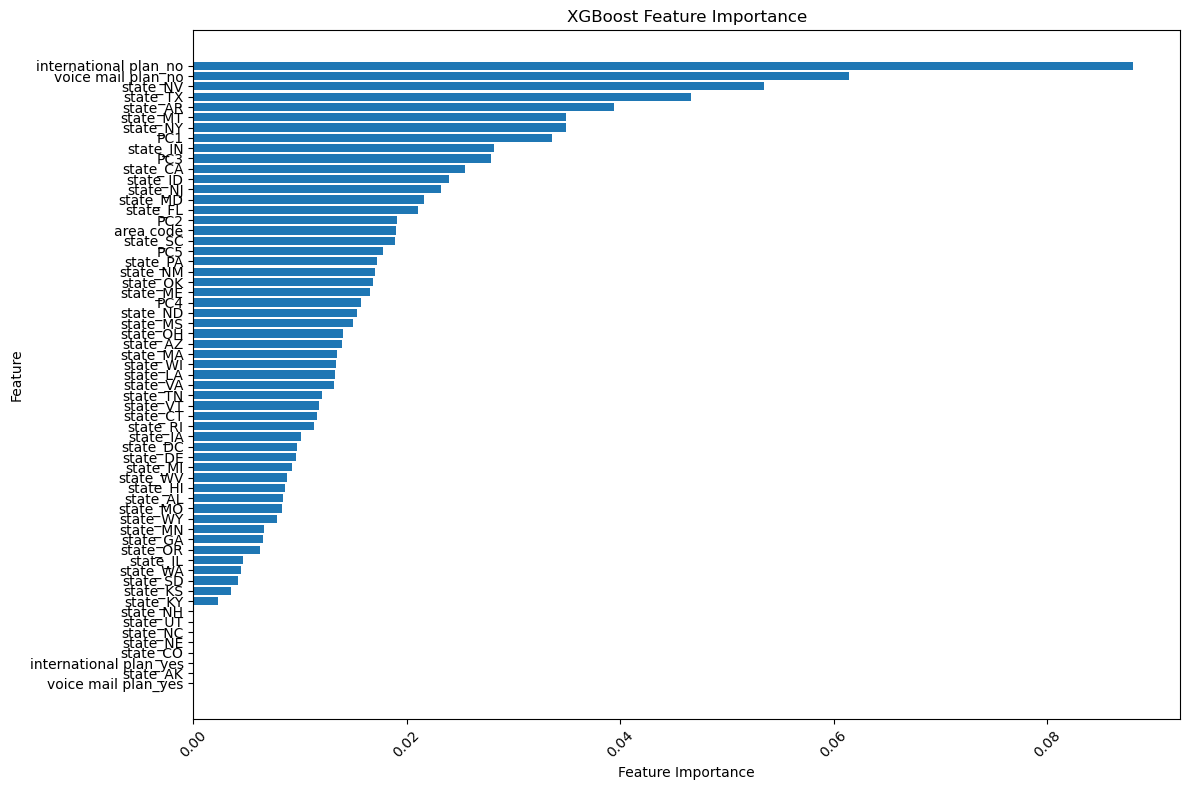

In [249]:
# Get feature importances
feature_importances = xgb_best.named_steps['classifier'].feature_importances_

# Get feature names from your DataFrame
feature_names = X_train.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))  
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.xticks(rotation=45)  
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()










The five  best features for our model as dispalyed by the above graph :
1. International plan no

2. voice mail plan no

3. state ny

4. state tx

5. state ar

MODEL DEPLOYMENT


In [253]:
import pickle

# Make predictions on the scaled testing data
y_pred = xgb_best.predict(X_test)

# Save the trained model to a file
with open("XGBoost_Model.pkl", "wb") as file:
    pickle.dump(xgb_best, file)


CONCLUSIONS:

1. Subscription Plans: The features 'international_plan' and 'voice_mail_plan' have the highest importance scores, indicating that customers' subscriptions to these additional services are strong predictors of churn behavior.

2. Geographical Location: The feature 'area_code' has a relatively low importance score, indicating that a customer's geographical location may not be as influential in predicting churn compared to other features.

3. The feature 'account_length' has a moderate importance score, implying that the length of time a customer has been with SyriaTel plays a role in their likelihood of churning.



RECOMMENDATIONS:

1. Subscription Plan Optimization: SyriaTel should focus on optimizing their international and voice mail plan offerings, ensuring competitive pricing, high-quality service, and attractive features to retain customers subscribed to these plans. Additionally, monitoring changes in usage patterns for these plans could help identify potential churners early on.

2. Customer Loyalty Programs: Develop targeted loyalty programs and incentives for long-term customers to enhance their satisfaction and reduce the likelihood of churn. Offering tailored plans, discounts, or exclusive benefits based on tenure could be an effective retention strategy.

3. Call Usage Monitoring: Implement robust systems to track customers' calling behavior, including call duration, frequency, and patterns across different times of the day and international destinations. Identifying sudden changes or abnormal patterns could serve as an early warning for potential churn, enabling proactive retention efforts.

 
